# Lead Scoring Case Study

## Problem Statement

An X Education company has a very poor lead conversion rate. The company wishes to identify the most potential leads, also known as ‘Hot Leads’, so that it can improve the conversion rate. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals and Objectives

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert into a paying customer whereas a lower score would mean that the lead is cold and will mostly not get converted. 
- The target lead conversion rate need to be around 80%.


### 1. Import libraries and load the data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
# Import Data
inp_lead = pd.read_csv(r'D:\UpGrad-MS-DS\Module 2 - Machine Learning I\Lead Scoring Case Study\Lead Scoring Assignment\Leads.csv')

### 2. Inspect the Dataframe

In [3]:
# Check the head
inp_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Check the shape
inp_lead.shape

(9240, 37)

In [5]:
# Check dataframe for null and datatype 
inp_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
inp_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### 3. Data Cleaning

###### 3.1 Check for Duplicate rows

In [7]:
# duplicate record count
inp_lead.duplicated().sum()

0

In [8]:
# Drop duplicate records
inp_lead1 = inp_lead.drop_duplicates()

###### 3.2 Check invalid values

In [9]:
# creating columns lists
con_cols = ['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score',
             'Converted', 'Total Time Spent on Website']
cat_cols = [ 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality','Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',  'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
id_cols = ['Prospect ID','Lead Number']

In [10]:
# Removing Id columns since they are unique for everyone
inp_lead1 = inp_lead1.drop(id_cols,axis=1)

In [11]:
# duplicate record count
inp_lead1.duplicated().sum()

1281

In [12]:
# Drop duplicate records
inp_lead2 = inp_lead1.drop_duplicates()

In [13]:
inp_lead2.shape

(7959, 35)

In [14]:
# Check for invalid values in the categorical columns
for col in cat_cols:
    print("################ Frequency Count for column - {} #########".format(col))
    print(inp_lead2[col].value_counts())

################ Frequency Count for column - Lead Origin #########
Landing Page Submission    4886
API                        2498
Lead Add Form               522
Lead Import                  52
Quick Add Form                1
Name: Lead Origin, dtype: int64
################ Frequency Count for column - Lead Source #########
Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            673
Reference             410
Referral Sites        125
Welingak Website       73
Facebook               52
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64
################ Frequency Count for column - Do Not Email #########
No     7263
Yes     696
N

#### Note: Except the value "Select" all the other values of all columns are looking fine. We need to convert all "Select" to NaN since it means no option is selected.

In [15]:
# Converting all the values one case i.e lower case
inp_lead2 = inp_lead2.applymap(lambda s:s.lower() if type(s) == str else s)

In [16]:
# Replacing 'Select' with NaN (Since it means no option is selected)
inp_lead2 = inp_lead2.replace('select',np.nan)

#### 3.3 Missing Values

In [17]:
# Check missing value percentage of all columns present in the dataframe
df_missing = pd.DataFrame({'column_name': inp_lead2.columns,
                                 'percent_missing': inp_lead2.isnull().sum() * 100 / len(inp_lead2)}).reset_index(drop=True)
df_missing.sort_values('percent_missing', inplace=True, ascending=False)
print(df_missing[df_missing['percent_missing']!=0])

                                      column_name  percent_missing
11             How did you hear about X Education        74.996859
26                                   Lead Profile        71.880890
23                                   Lead Quality        46.551074
30                    Asymmetrique Activity Score        44.163840
31                     Asymmetrique Profile Score        44.163840
29                     Asymmetrique Profile Index        44.163840
28                    Asymmetrique Activity Index        44.163840
27                                           City        30.292750
22                                           Tags        30.179671
10                                 Specialization        27.516020
13  What matters most to you in choosing a course        24.751853
12                What is your current occupation        24.513130
9                                         Country        14.825983
5                                     TotalVisits         1.72

##### Note: There are 17 columns which have missing values. 13 out of them have more than 10% of null values as seen above. But removing the rows with the null value will cost us a lot of data loss and they can be important columns. So, instead we are going to replace the NaN values with 'missing' for important variables such as "Specialization","What matters most to you in choosing a course","Country" and "What is your current occupation". After that we will see the null value percentage again.

In [18]:
# Creating missing category
inp_lead2['Specialization'] = inp_lead2['Specialization'].fillna('missing') 
inp_lead2['What matters most to you in choosing a course'] = inp_lead2['What matters most to you in choosing a course'].fillna('missing')
inp_lead2['Country'] = inp_lead2['Country'].fillna('missing')
inp_lead2['What is your current occupation'] = inp_lead2['What is your current occupation'].fillna('missing')

In [19]:
# Recheck missing value percentage of all columns present in the dataframe
df_missing = pd.DataFrame({'column_name': inp_lead2.columns,
                                 'percent_missing': inp_lead2.isnull().sum() * 100 / len(inp_lead2)}).reset_index(drop=True)
df_missing.sort_values('percent_missing', inplace=True, ascending=False)
print(df_missing[df_missing['percent_missing']!=0])

                           column_name  percent_missing
11  How did you hear about X Education        74.996859
26                        Lead Profile        71.880890
23                        Lead Quality        46.551074
28         Asymmetrique Activity Index        44.163840
31          Asymmetrique Profile Score        44.163840
30         Asymmetrique Activity Score        44.163840
29          Asymmetrique Profile Index        44.163840
27                                City        30.292750
22                                Tags        30.179671
5                          TotalVisits         1.721322
7                 Page Views Per Visit         1.721322
8                        Last Activity         1.294132
1                          Lead Source         0.414625


#### Now, let's remove the variables having more than 30% of null values.

In [20]:
# Removing all the columns those have >= 30% null values
cols = inp_lead2.columns
for col in cols:
    if round(100*(inp_lead2[col].isnull().sum()/len(inp_lead2[col].index)), 2)>=30:
        print(col, "-", "Dropped")
        inp_lead2.drop([col],axis=1,inplace=True)

How did you hear about X Education - Dropped
Tags - Dropped
Lead Quality - Dropped
Lead Profile - Dropped
City - Dropped
Asymmetrique Activity Index - Dropped
Asymmetrique Profile Index - Dropped
Asymmetrique Activity Score - Dropped
Asymmetrique Profile Score - Dropped


In [21]:
# Recheck missing value percentage of all columns present in the dataframe
df_missing = pd.DataFrame({'column_name': inp_lead2.columns,
                                 'percent_missing': inp_lead2.isnull().sum() * 100 / len(inp_lead2)}).reset_index(drop=True)
df_missing.sort_values('percent_missing', inplace=True, ascending=False)
print(df_missing[df_missing['percent_missing']!=0])

            column_name  percent_missing
5           TotalVisits         1.721322
7  Page Views Per Visit         1.721322
8         Last Activity         1.294132
1           Lead Source         0.414625


##### There are still columns where some missing values are present. We will investigate these columns and impute after train test Split to data avoid data leakage. 
- Lead Source
- TotalVisits 
- Page Views Per Visit
- Last Activity

In [22]:
# duplicate record count
inp_lead2.duplicated().sum()

566

In [23]:
# Drop duplicate records
inp_lead3 = inp_lead2.drop_duplicates()

In [24]:
inp_lead3.shape

(7393, 26)

#### 3.4 Outliers & Their Treatment

In [25]:
# Ctaegorise columns
con_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

In [26]:
inp_lead3[con_cols].describe()

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  7257.000000           7257.000000                  7393.000000
mean      4.320243              2.962484                   609.192209
std       5.078080              2.020828                   548.812520
min       0.000000              0.000000                     0.000000
25%       2.000000              2.000000                   146.000000
50%       3.000000              2.500000                   372.000000
75%       5.000000              4.000000                  1087.000000
max     251.000000             55.000000                  2272.000000

0.00      0.0
0.25      2.0
0.50      3.0
0.75      5.0
0.80      6.0
0.85      7.0
0.90      8.0
0.95     10.0
0.97     13.0
0.99     18.0
1.00    251.0
Name: TotalVisits, dtype: float64
Approx Outlier Count: 174


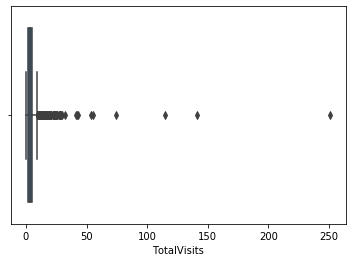

0.00     0.0
0.25     2.0
0.50     2.5
0.75     4.0
0.80     4.0
0.85     5.0
0.90     5.0
0.95     6.0
0.97     7.0
0.99    10.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64
Approx Outlier Count: 211


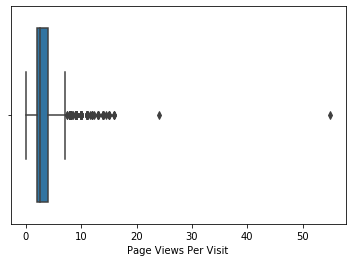

0.00       0.00
0.25     146.00
0.50     372.00
0.75    1087.00
0.80    1203.60
0.85    1318.00
0.90    1449.80
0.95    1606.00
0.97    1701.48
0.99    1859.24
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64
Approx Outlier Count: 222


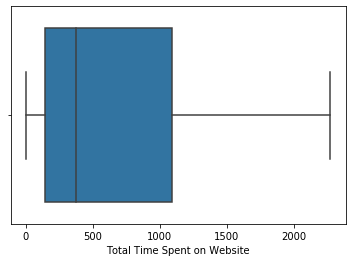

In [27]:
for col in con_cols:
    sns.boxplot(inp_lead3[col])
    print(inp_lead3[col].quantile([0,0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.97,0.99,1]))
    print('Approx Outlier Count:' , len(inp_lead3[inp_lead3[col] > inp_lead3[col].quantile(0.97)]))
    plt.show()

#### Note: Seems the columns "TotalVisit" & "Page Views Per Visit" have outliers.

#### Outlier Treatment

In [28]:
for var in ['Page Views Per Visit','TotalVisits']:
    q1=inp_lead3[var].describe()["25%"]
    q3=inp_lead3[var].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    inp_lead3[var]=np.where(inp_lead3[var]>upper_bound,upper_bound,inp_lead3[var])#capping

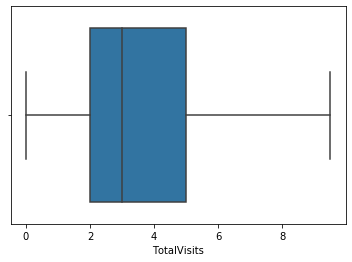

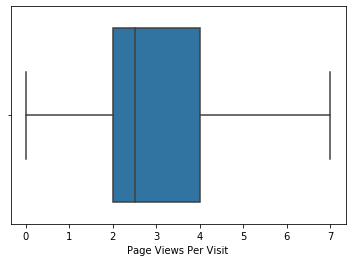

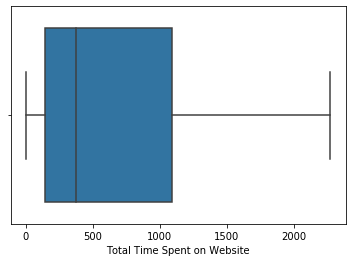

In [29]:
for col in con_cols:
    sns.boxplot(inp_lead3[col])
    plt.show()

In [30]:
# Create columns lists
con_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email',       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity','Converted']
id_cols = ['Prospect ID','Lead Number']
pie_cols = ['Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums' ,'Newspaper' ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Converted'] 
bar_cols = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']

###### Additional Check - row wise missing data Check: If we find most of the columns in a row is missing we can remove that record from analysis.

In [31]:
# Check row wise missing data
def count(df):
    df['missing'] = np.sum(df == 'missing')
    return df
print("Maximum missing in a row:", max(inp_lead3.apply(count, axis = 1)['missing']+inp_lead3.isnull().sum(axis=1)))
print("Total number of columns:",len(inp_lead3.columns))
# inp_lead2['Missing_Temp'] = inp_lead3.apply(count, axis = 1)['missing']+inp_lead3.isnull().sum(axis=1)
# inp_lead2[inp_lead2['Missing_Temp']==4].shape

Maximum missing in a row: 6
Total number of columns: 26


#### 4.1 Univariate Analysis - Categorical Variables

In [32]:
# Check for categorical value percentage for each columns
for col in cat_cols:
    print("################ Frequency Count for column - {} #########".format(col))
    print(inp_lead3[col].value_counts(normalize=True))

################ Frequency Count for column - Lead Origin #########
landing page submission    0.660760
api                        0.288246
lead add form              0.044907
lead import                0.005952
quick add form             0.000135
Name: Lead Origin, dtype: float64
################ Frequency Count for column - Lead Source #########
google               0.389417
direct traffic       0.345047
organic search       0.156309
olark chat           0.042062
reference            0.035142
referral sites       0.016961
welingak website     0.006106
facebook             0.005970
bing                 0.000814
click2call           0.000543
social media         0.000271
press_release        0.000271
welearn              0.000136
pay per click ads    0.000136
youtubechannel       0.000136
blog                 0.000136
nc_edm               0.000136
welearnblog_home     0.000136
live chat            0.000136
testone              0.000136
Name: Lead Source, dtype: float64
################

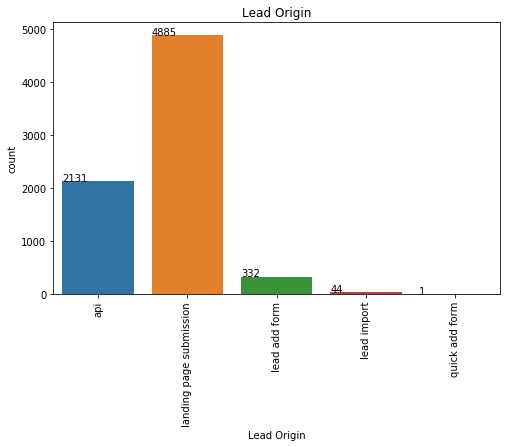

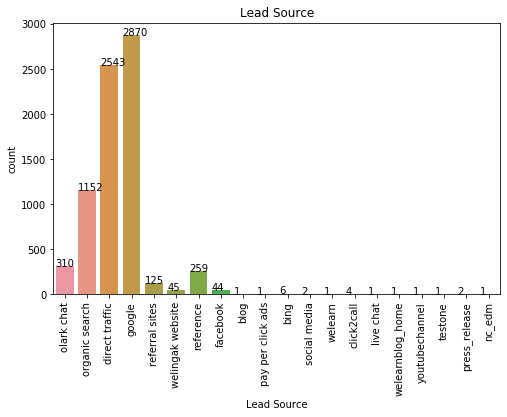

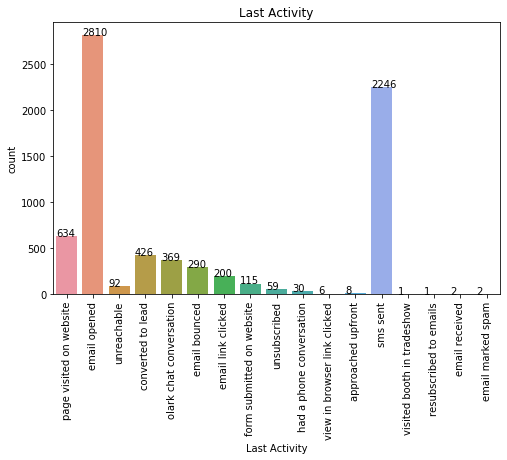

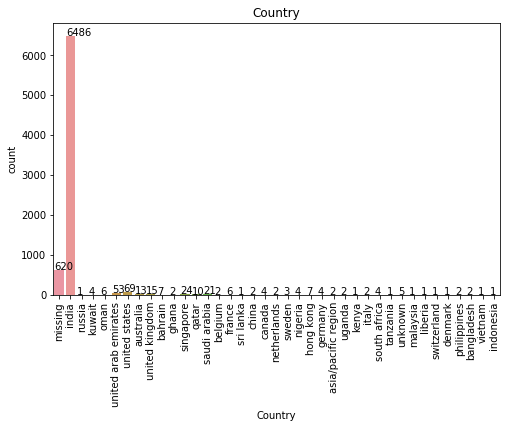

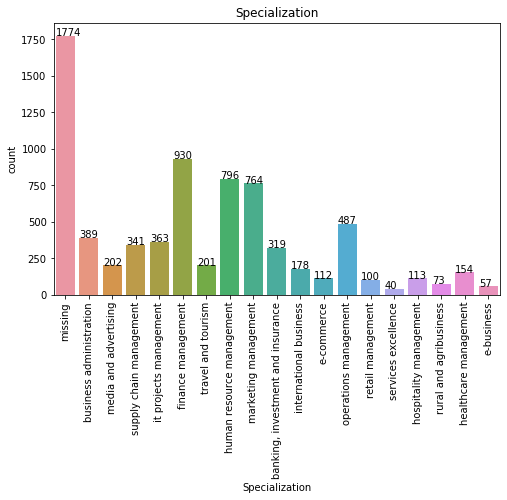

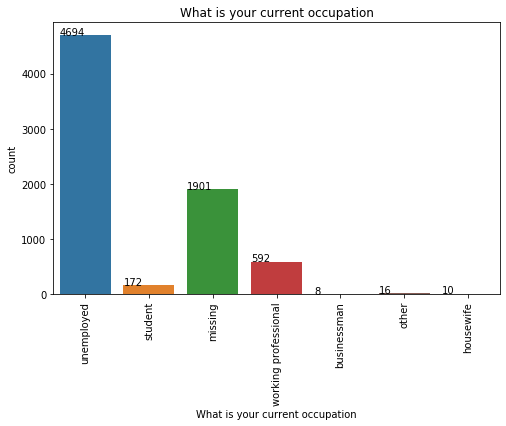

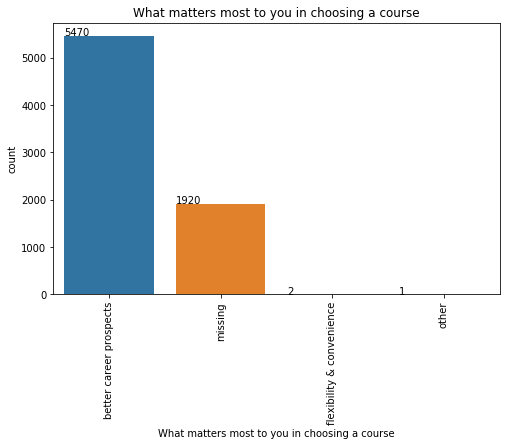

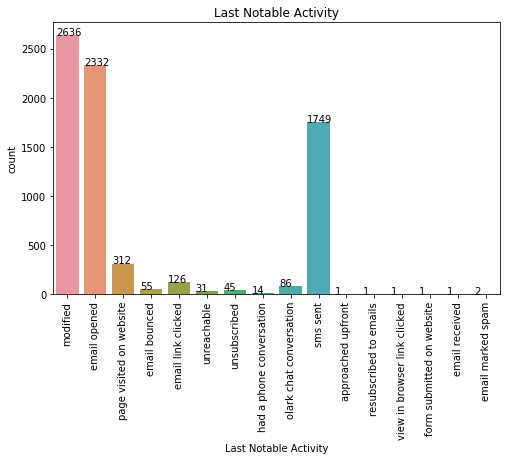

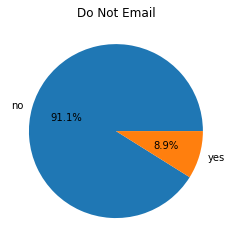

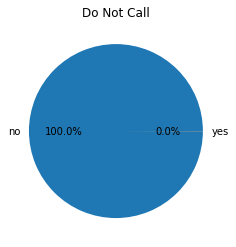

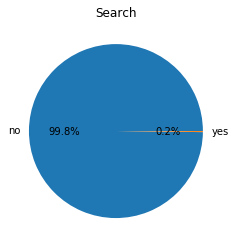

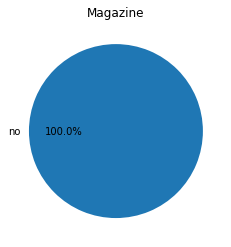

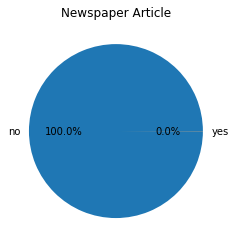

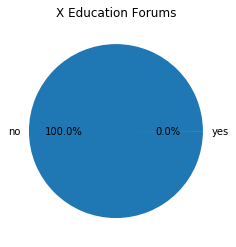

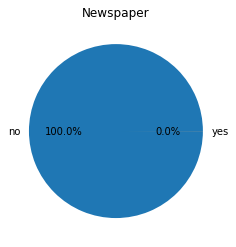

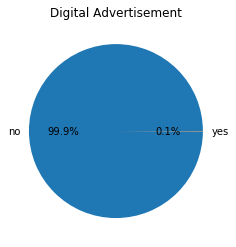

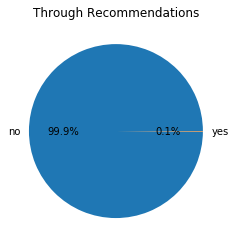

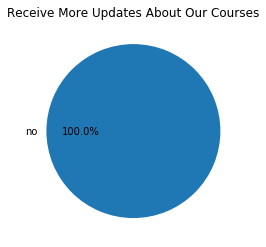

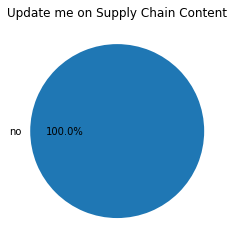

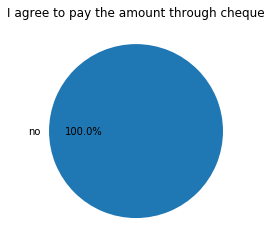

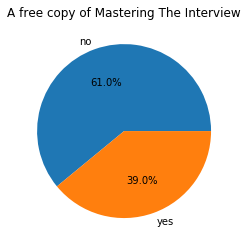

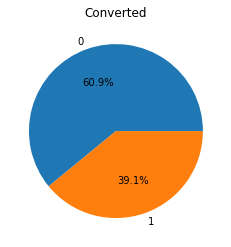

In [33]:
for col in bar_cols:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=col, data=inp_lead3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    plt.title(col)
    plt.show()
for i in range(len(pie_cols)):
    inp_lead3[pie_cols[i]].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(4,4), label='', title=pie_cols[i])
    plt.show()

##### Univariate Findings:

1. In column "Lead Origin", 66% is the highest for value "landing page submission" and the "quick add form" is least occuring records i.e 0.0001%.
2. In column "Lead Source", The most dominating values are (google, direct traffic, olark chat , organic search ,reference , welingak website, referral sites, facebook ). Since all other categories are very less we can put those sources to a category  "Other_Sources".
3. In Country column, other than "India" and "missing" there are no significant number of records for other countries. hence created one category as "outside_india" to put these records all together.
4. ~24% of the people did not respond to the Specialization.
5. ~64% of the leads are Unemployed.
6. ~74% of the leads willing to do the courcse for better carreer prospect.
7. 100% of records have the value for one category (YES/NO) in the following columns: "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forum", "News Paper", "Digital Adverisement", "Through Recomendation", "Recieve more update about the courses", "Update me on supply chain content", "I agree to pay the amount through cheque", "Digital Adverisement" and "A free copy of Mastering the Interview". Hence we are dropping these.
8. The data has 62% non-converted leads i.e 0.
9. The column Last Activity & Last notable activity sounds similar. We need to investigate more about it.

##### There are below categorical columns where the one category is dominating (>95%) the column values. In that case we will drop those columns.
- Do Not Call
- Search 
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

In [34]:
# Lead sources categorization
lead_vals = ['google','direct traffic', 'olark chat' ,'organic search', 'reference', 'welingak website', 'referral sites', 'facebook']
inp_lead3['Lead Source'] = np.where(inp_lead3['Lead Source'].isin(lead_vals),inp_lead3['Lead Source'],'other sources' )
inp_lead3['Lead Source'].value_counts(normalize=True)

google              0.388205
direct traffic      0.343974
organic search      0.155823
olark chat          0.041932
reference           0.035033
referral sites      0.016908
other sources       0.006087
welingak website    0.006087
facebook            0.005952
Name: Lead Source, dtype: float64

In [35]:
# Categorizing country column
def origin_county(x):
    origin = ""
    if x == "india":
        origin = "india"
    elif x == "missing":
        origin = "missing"
    else:
        origin = "outside india"
    return origin

inp_lead3['Country'] = inp_lead3.apply(lambda x:origin_county(x['Country']), axis = 1)
inp_lead3['Country'].value_counts(normalize=True)

india            0.877316
missing          0.083863
outside india    0.038821
Name: Country, dtype: float64

##### Similarity check between - 'Last Activity' vs 'Last Notable Activity'

In [36]:
inp_lead3[['Last Activity','Last Notable Activity']].head()

Last Activity Last Notable Activity
0  page visited on website              modified
1             email opened          email opened
2             email opened          email opened
3              unreachable              modified
4        converted to lead              modified

In [37]:
inp_lead3['Last Activity'].value_counts(normalize=True)

email opened                    0.385407
sms sent                        0.308051
page visited on website         0.086957
converted to lead               0.058428
olark chat conversation         0.050610
email bounced                   0.039775
email link clicked              0.027431
form submitted on website       0.015773
unreachable                     0.012618
unsubscribed                    0.008092
had a phone conversation        0.004115
approached upfront              0.001097
view in browser link clicked    0.000823
email received                  0.000274
email marked spam               0.000274
resubscribed to emails          0.000137
visited booth in tradeshow      0.000137
Name: Last Activity, dtype: float64

In [38]:
inp_lead3['Last Notable Activity'].value_counts(normalize=True)

modified                        0.356553
email opened                    0.315434
sms sent                        0.236575
page visited on website         0.042202
email link clicked              0.017043
olark chat conversation         0.011633
email bounced                   0.007439
unsubscribed                    0.006087
unreachable                     0.004193
had a phone conversation        0.001894
email marked spam               0.000271
form submitted on website       0.000135
view in browser link clicked    0.000135
email received                  0.000135
approached upfront              0.000135
resubscribed to emails          0.000135
Name: Last Notable Activity, dtype: float64

###### Observation:  The  'Last Activity' and 'Last Notable Activity' are not the same.

#### Remove columns having only one value for all records

In [39]:
# Checking if there are columns with one unique value since it won't affect our analysis
inp_lead3.nunique()

Lead Origin                                         5
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        11
Total Time Spent on Website                      1731
Page Views Per Visit                               96
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [40]:
# Dropping the columns which contains only 1 value as it is not helpful for analysis
cols = inp_lead3.columns
for col in cols:
    if inp_lead3[col].nunique() == 1:
        print(col, "-", "Dropped")
        inp_lead3.drop([col],axis=1,inplace=True)

Magazine - Dropped
Receive More Updates About Our Courses - Dropped
Update me on Supply Chain Content - Dropped
Get updates on DM Content - Dropped
I agree to pay the amount through cheque - Dropped


In [41]:
# Remove categorical columns where the one category is > 95%
del_cols = ["Do Not Call", "Search","Newspaper Article", "X Education Forums","Newspaper","Digital Advertisement", "Through Recommendations"]
inp_lead3 = inp_lead3.drop(del_cols,axis=1)

In [42]:
# duplicate record count
inp_lead3.duplicated().sum()

1

In [43]:
# Drop duplicate records
inp_lead4 = inp_lead3.drop_duplicates()

In [44]:
# Check the shape
inp_lead4.shape

(7392, 14)

In [45]:
# Column lists
id_cols = ['Prospect ID', 'Lead Number']
cat_cols = ['Lead Origin', 'Lead Source', 'Converted','Last Activity', 'Country', 'Specialization',
            'What is your current occupation', 'What matters most to you in choosing a course',  'A free copy of Mastering The Interview', 'Last Notable Activity']
cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
pie_cols = ['A free copy of Mastering The Interview','Converted'] 
bar_cols = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']

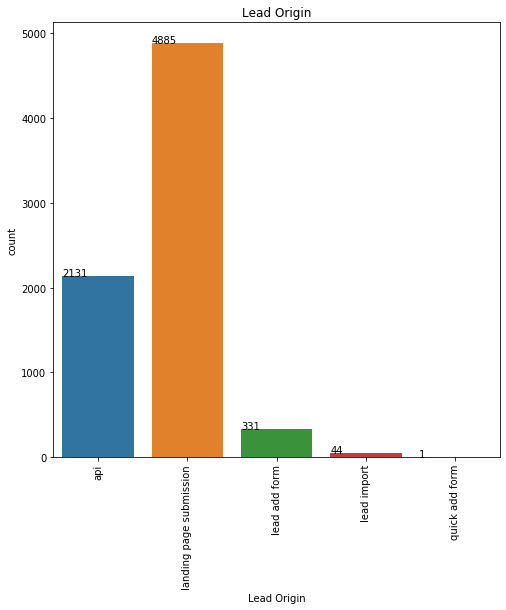

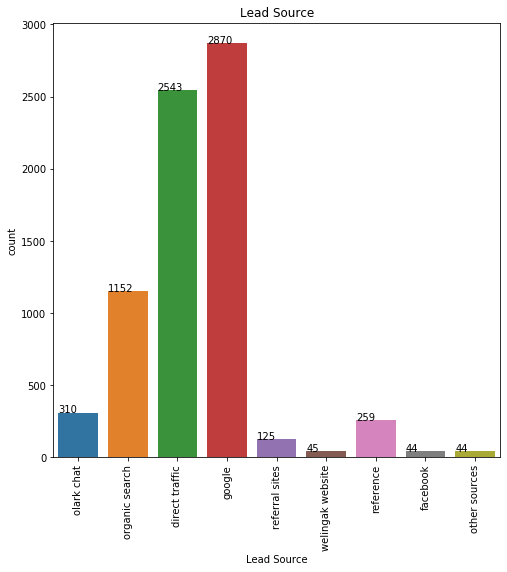

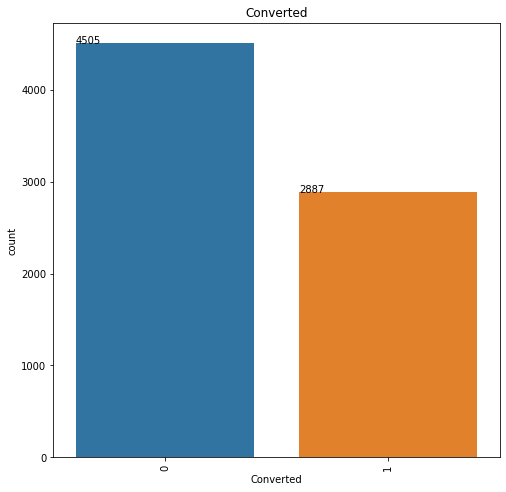

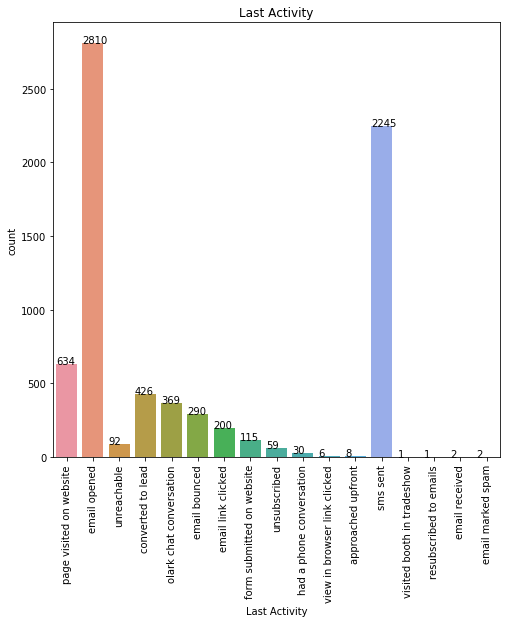

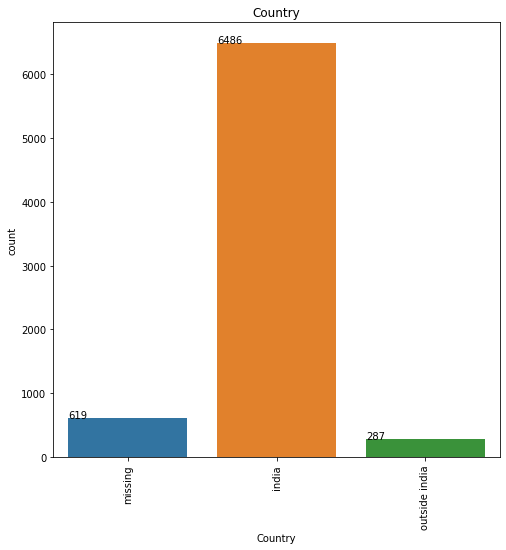

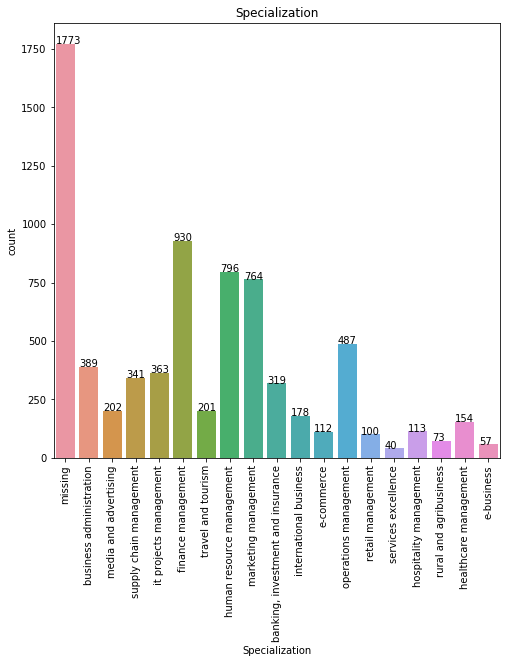

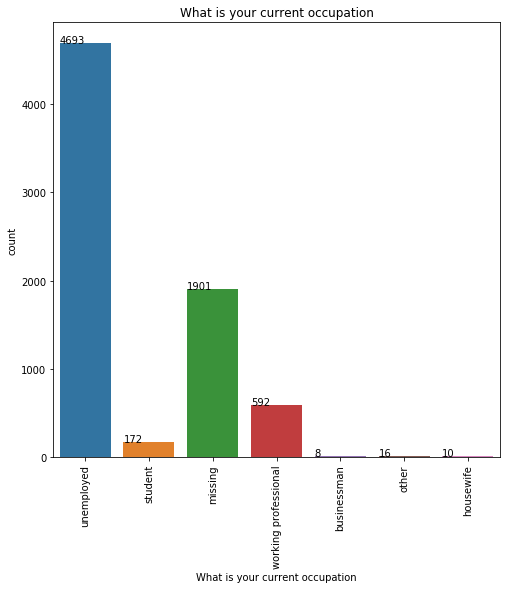

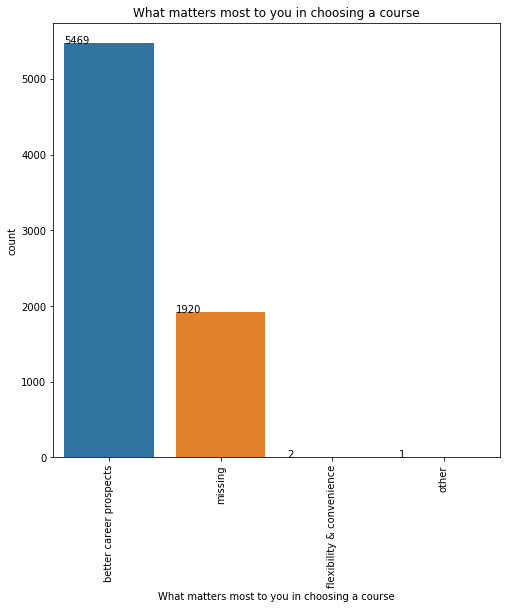

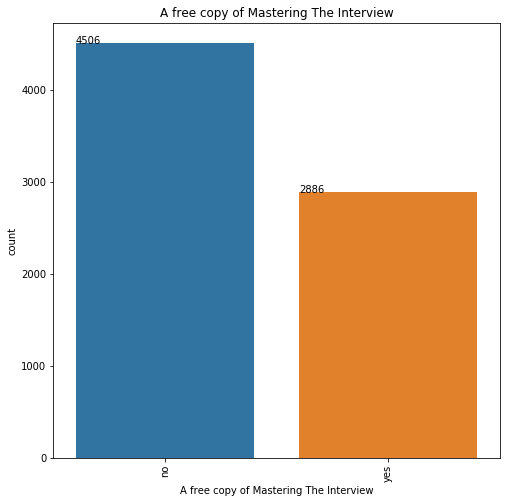

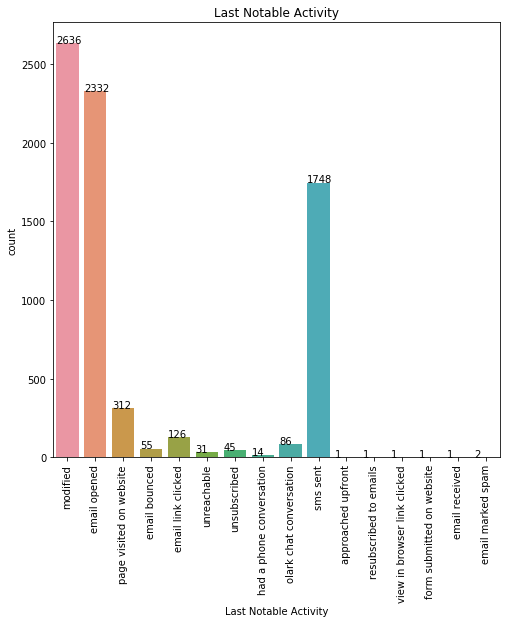

In [46]:
# Recheck the data after manipulation
for col in cat_cols:
    plt.figure(figsize=(8,8))
    ax = sns.countplot(x=col, data=inp_lead4)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    plt.title(col)
    plt.show()

#### 4.2 Segmented Univariate Analysis for Categorical variables

In [47]:
# Segment the dataframe
converted = inp_lead4[inp_lead.Converted == 1]
nonconverted = inp_lead4[inp_lead.Converted == 0]
print("Records count with converted:", len(converted))
print("Records count with nonconverted:", len(nonconverted))

Records count with converted: 2887
Records count with nonconverted: 4505


<Figure size 576x576 with 0 Axes>

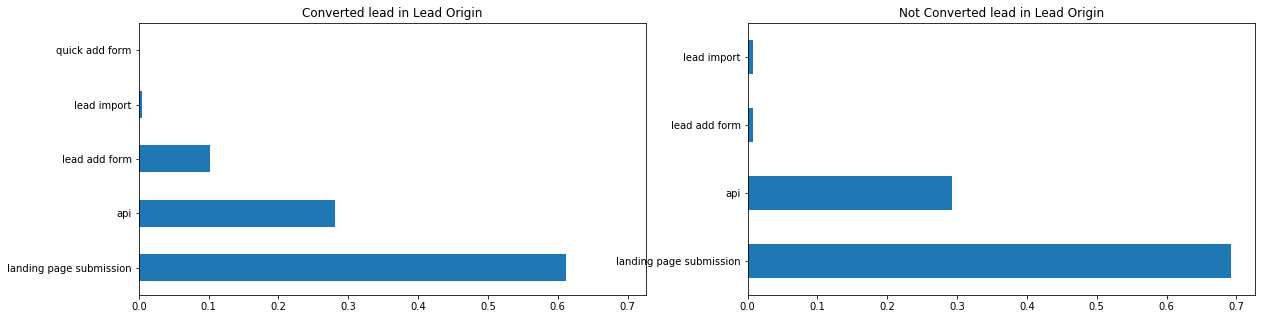

<Figure size 576x576 with 0 Axes>

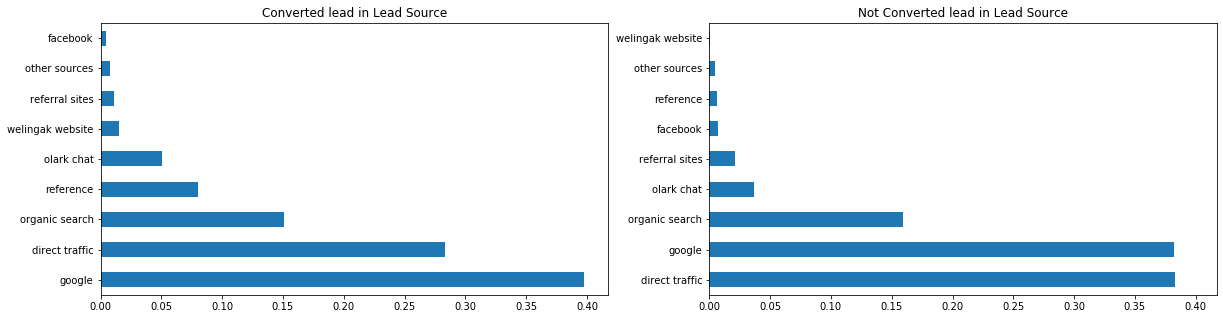

<Figure size 576x576 with 0 Axes>

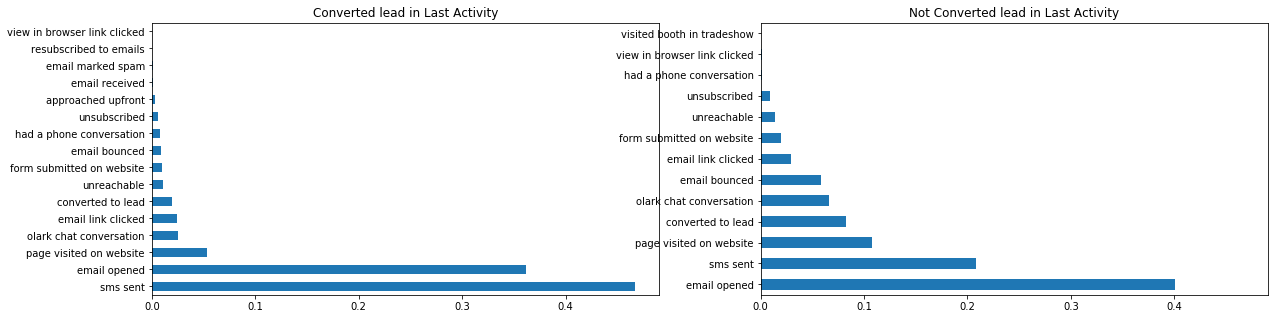

<Figure size 576x576 with 0 Axes>

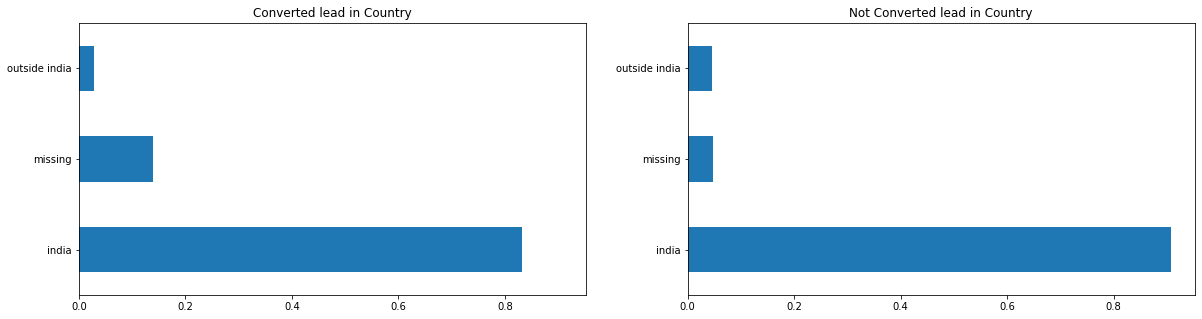

<Figure size 576x576 with 0 Axes>

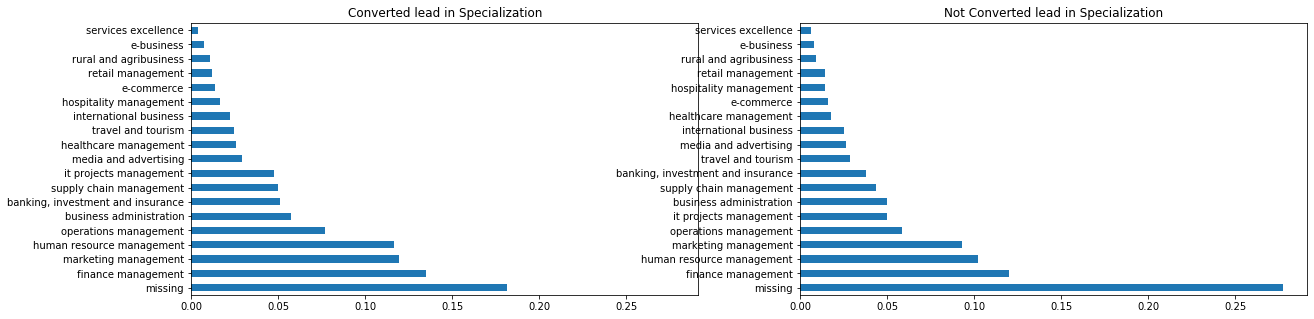

<Figure size 576x576 with 0 Axes>

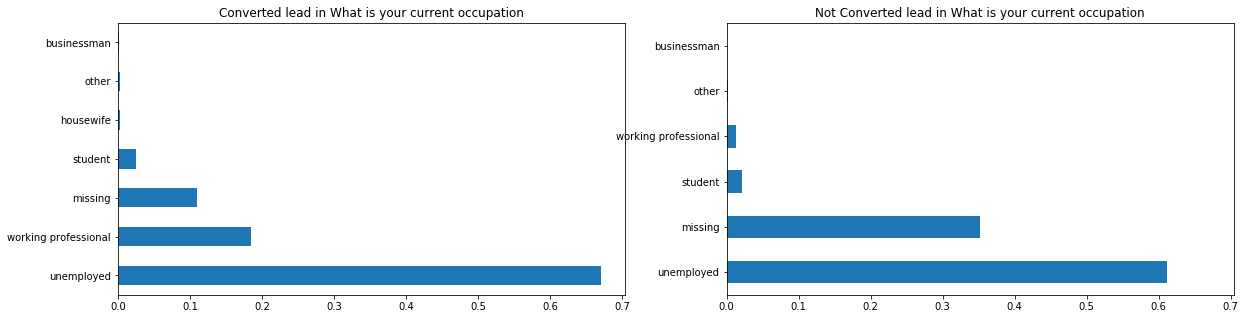

<Figure size 576x576 with 0 Axes>

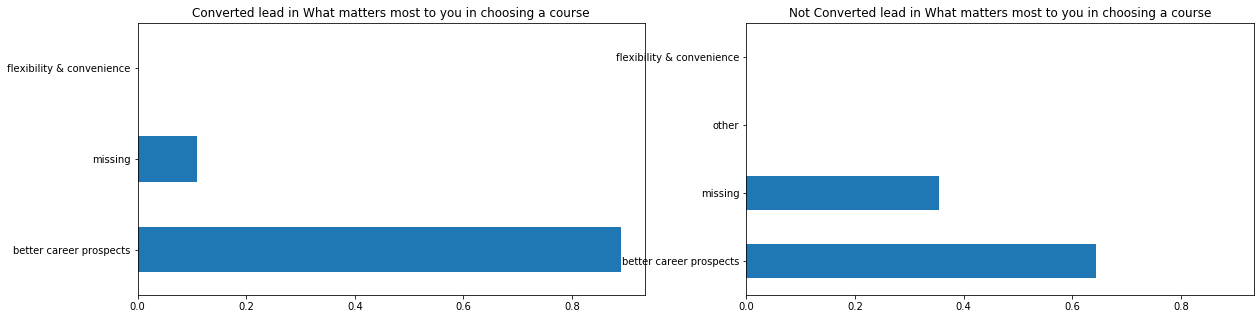

<Figure size 576x576 with 0 Axes>

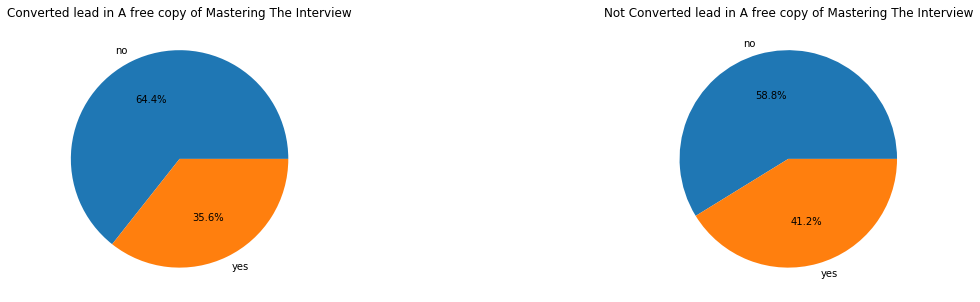

<Figure size 576x576 with 0 Axes>

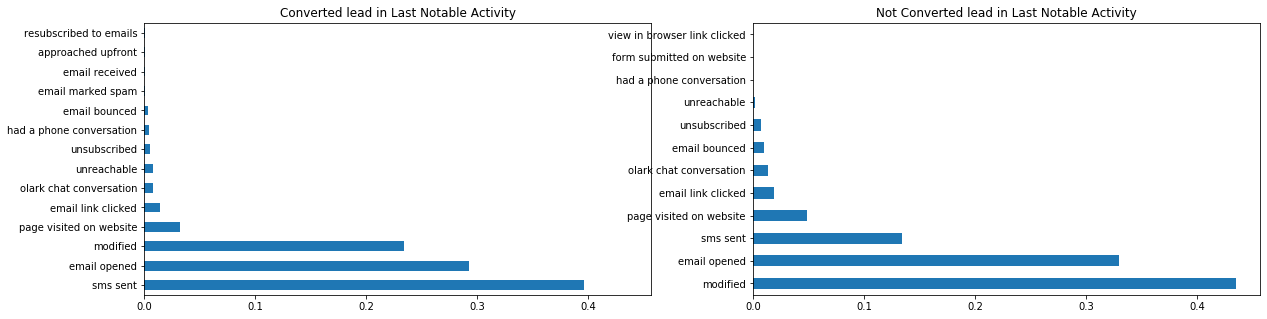

In [48]:
for i in cat_cols:
    if i != 'Converted':
        if i in bar_cols:
            plt.figure(figsize=[8,8])
            fig, axes = plt.subplots(nrows=1, ncols=2,sharex=True)
            converted[i].value_counts(normalize=True).plot.barh(ax=axes[0])
            axes[0].set_title('Converted lead in {}'.format(i))
            nonconverted[i].value_counts(normalize=True).plot.barh(ax=axes[1])
            axes[1].set_title('Not Converted lead in {}'.format(i))
            fig.set_size_inches(20, 5, forward=True)
            plt.show()
        else:
            plt.figure(figsize=[8,8])
            fig, axes = plt.subplots(nrows=1, ncols=2,sharex=True)
            converted[i].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', label='',ax=axes[0])
            axes[0].set_title('Converted lead in {}'.format(i))
            nonconverted[i].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', label='',ax=axes[1])
            axes[1].set_title('Not Converted lead in {}'.format(i))
            fig.set_size_inches(20, 5, forward=True)
            plt.show()

#### 4.3 Univariate Analysis - Numeric Variables

In [49]:
inp_lead4[cont_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  7256.000000                  7392.000000           7256.000000
mean      3.958310                   609.274621              2.881116
std       2.472095                   548.803895              1.661145
min       0.000000                     0.000000              0.000000
25%       2.000000                   146.000000              2.000000
50%       3.000000                   372.000000              2.500000
75%       5.000000                  1087.000000              4.000000
max       9.500000                  2272.000000              7.000000

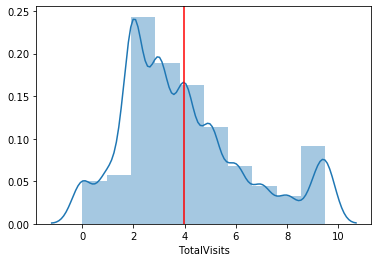

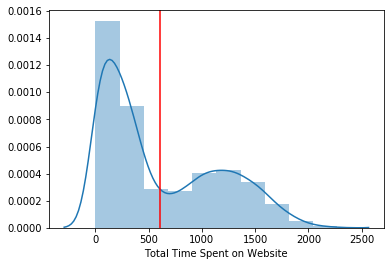

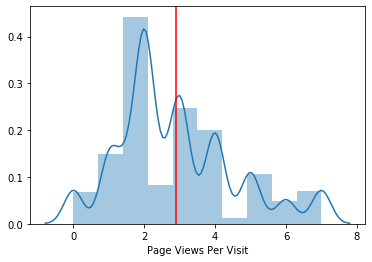

In [50]:
for i in cont_cols:
    sns.distplot(inp_lead3[i], bins=10)
    plt.axvline(inp_lead4[i].mean(),color='red')
    plt.show()

##### 4.4 Segmented Analysis On Numeric Columns

<Figure size 720x720 with 0 Axes>

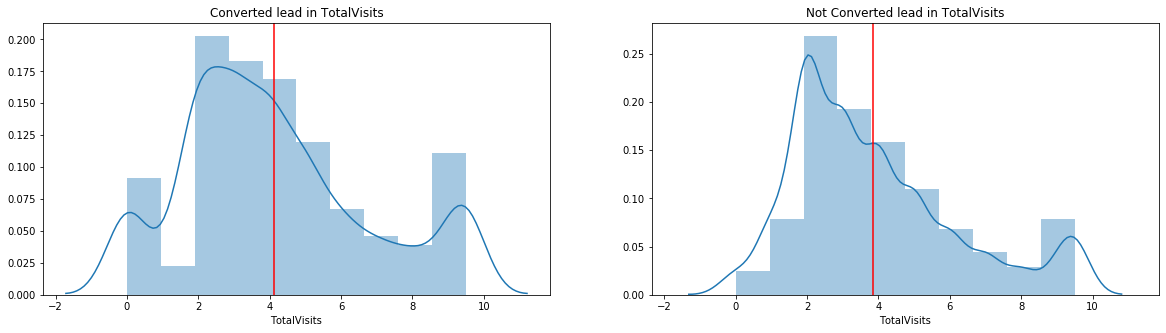

<Figure size 720x720 with 0 Axes>

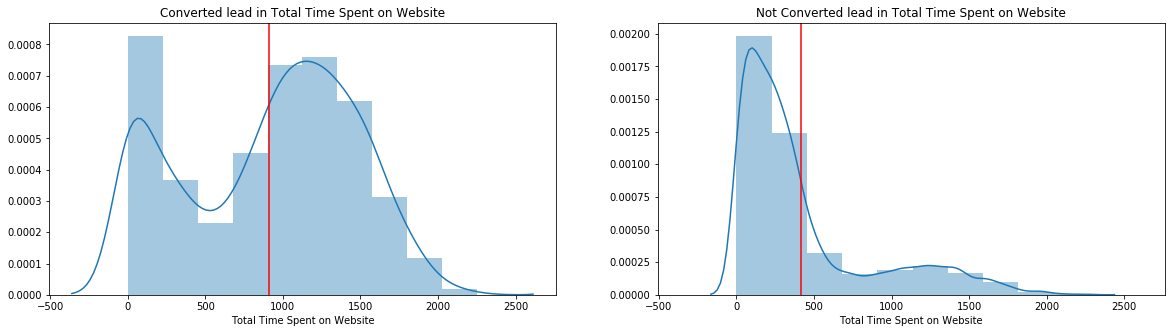

<Figure size 720x720 with 0 Axes>

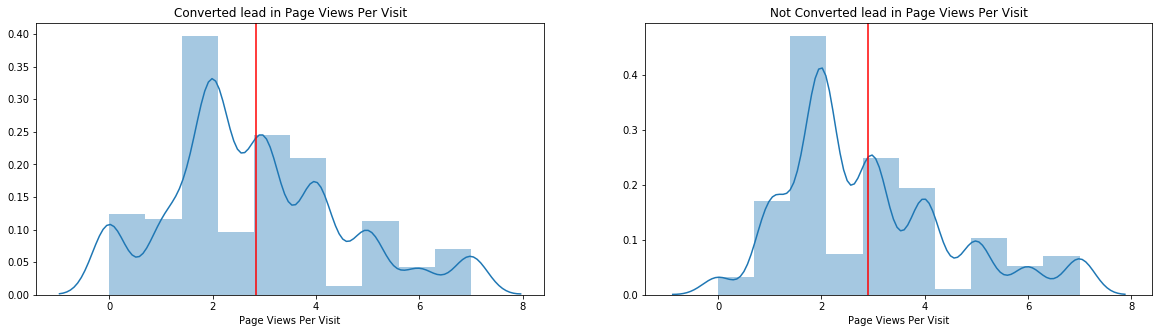

In [51]:
for i in cont_cols:
    plt.figure(figsize=[10,10])
    fig, axes = plt.subplots(nrows=1, ncols=2,sharex=True)
    sns.distplot(converted[i],ax=axes[0],bins=10)
    axes[0].axvline(converted[i].mean(),color='red')
    axes[0].set_title('Converted lead in {}'.format(i))
    sns.distplot(nonconverted[i],ax=axes[1],bins=10)
    axes[1].axvline(nonconverted[i].mean(),color='red')
    axes[1].set_title('Not Converted lead in {}'.format(i))
    fig.set_size_inches(20, 5, forward=True)
    plt.show()

#### 4.5 Bi-variate Analysis - Categorical vs Categorical Variables

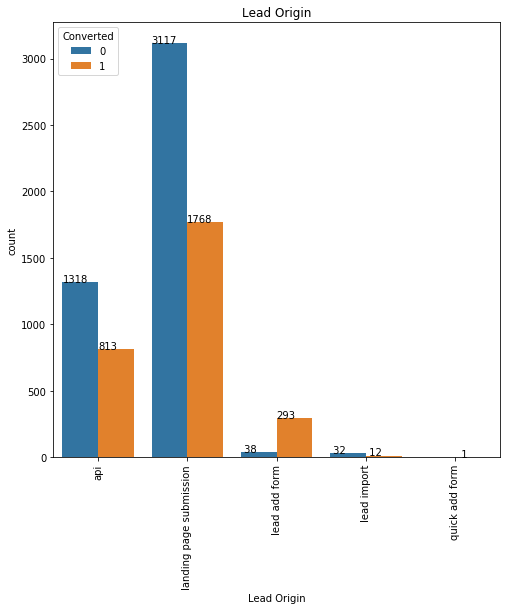

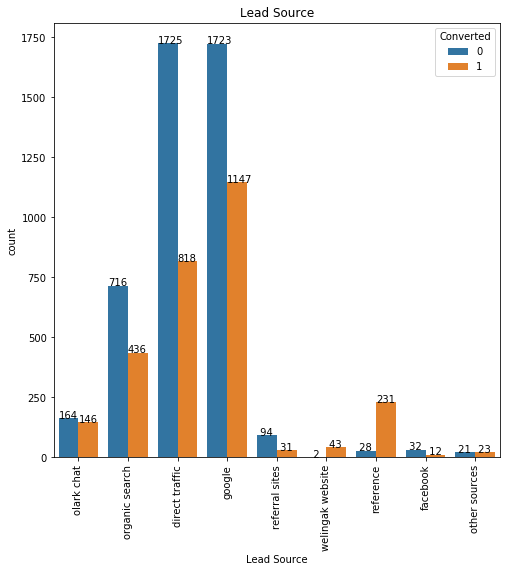

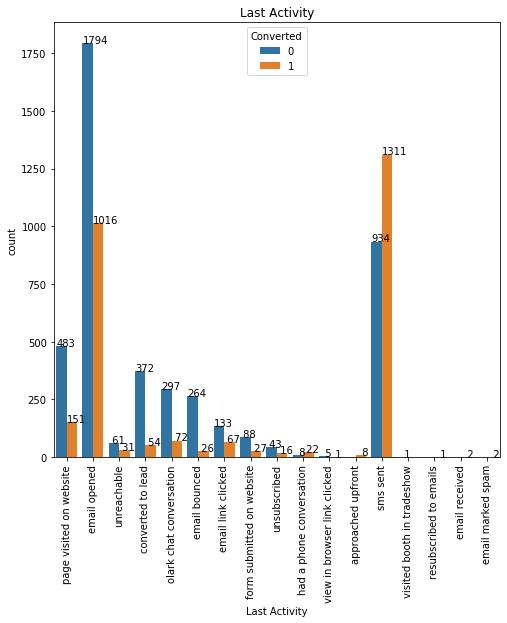

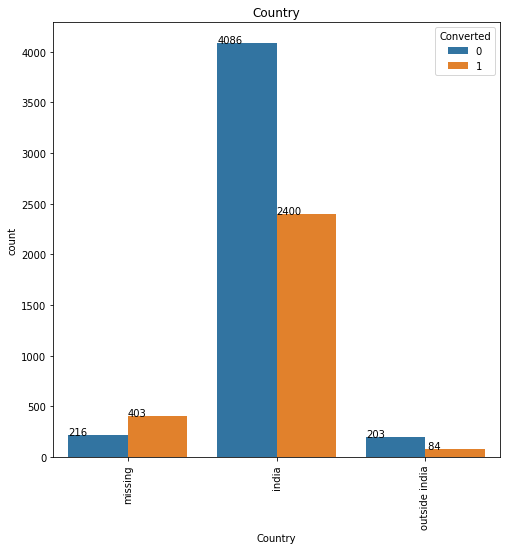

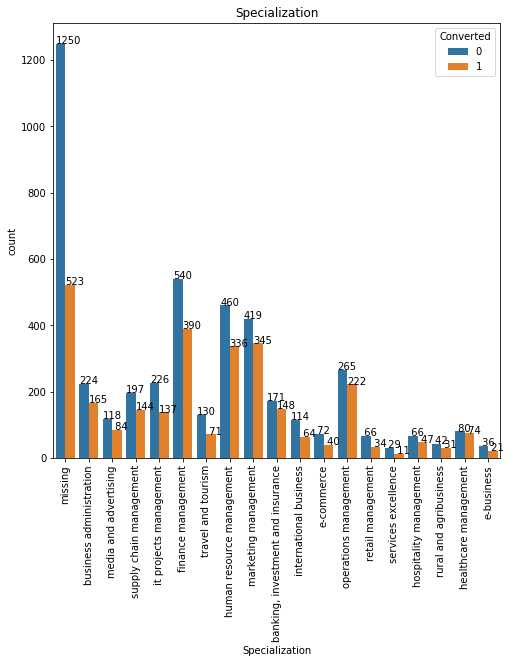

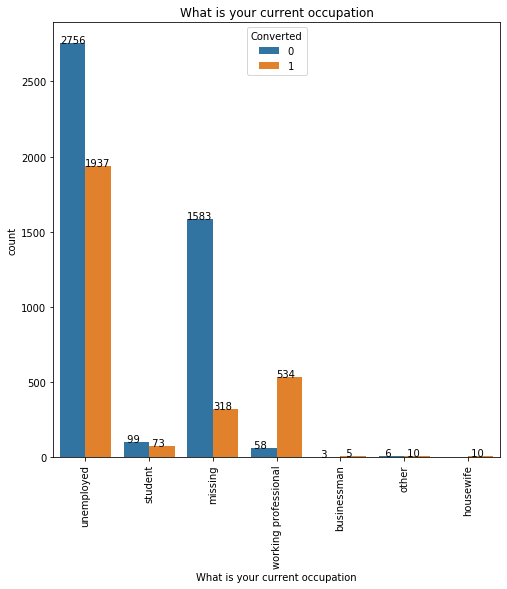

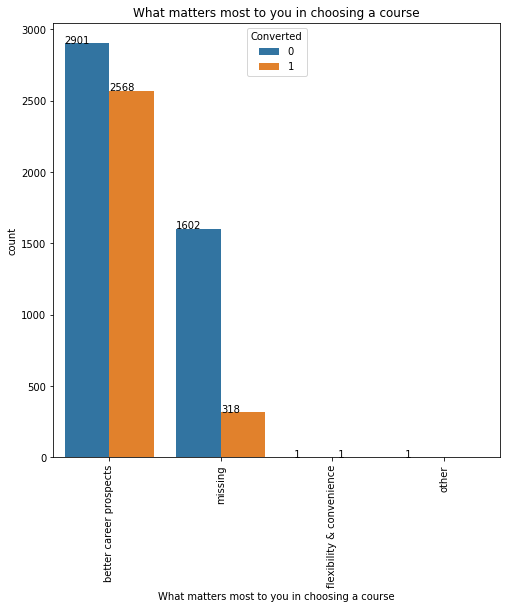

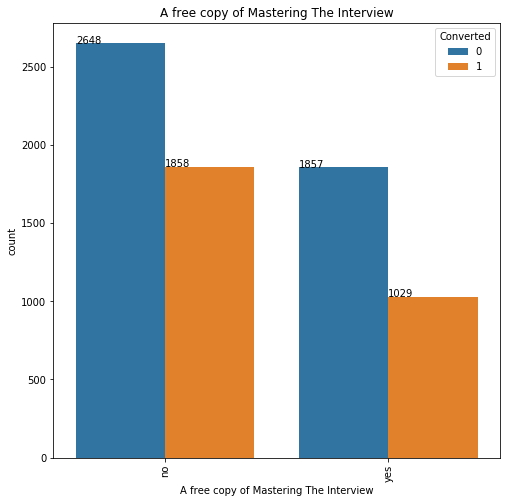

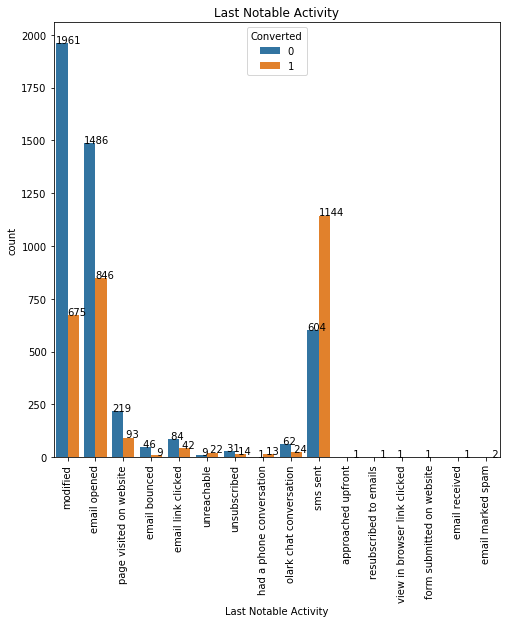

In [52]:
# Target vs all categorical column
for col in cat_cols:
    if col != 'Converted':
        plt.figure(figsize=(8,8))
        ax = sns.countplot(x=col,hue='Converted', data=inp_lead4)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        for p in ax.patches:
            ax.annotate('{:3.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
        plt.title(col)
        plt.show()

Scatterplot TotalVisits Vs Total Time Spent on Website


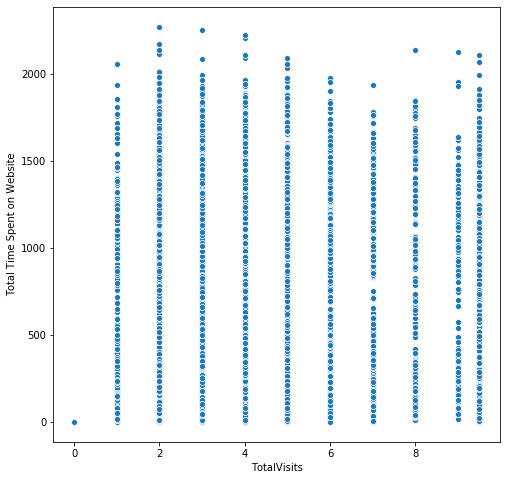

Scatterplot TotalVisits Vs Page Views Per Visit


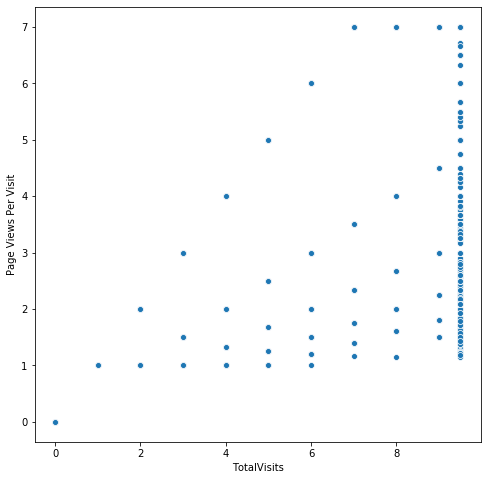

Scatterplot Total Time Spent on Website Vs TotalVisits


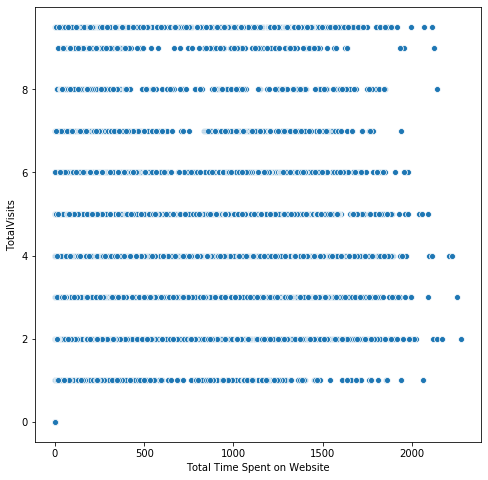

Scatterplot Total Time Spent on Website Vs Page Views Per Visit


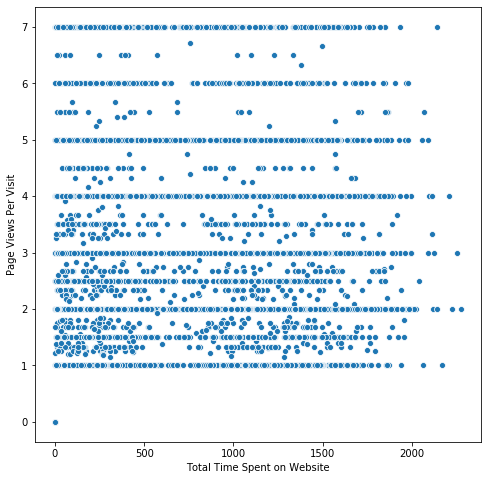

Scatterplot Page Views Per Visit Vs TotalVisits


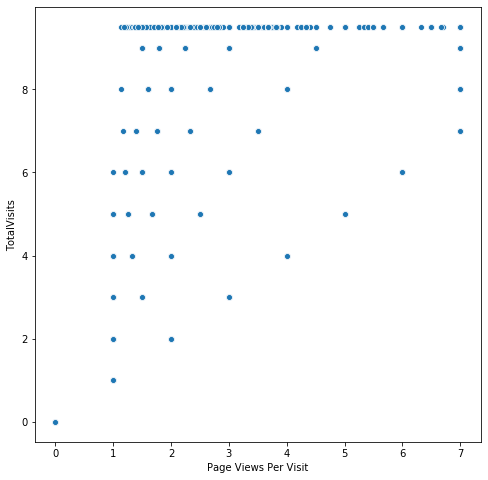

Scatterplot Page Views Per Visit Vs Total Time Spent on Website


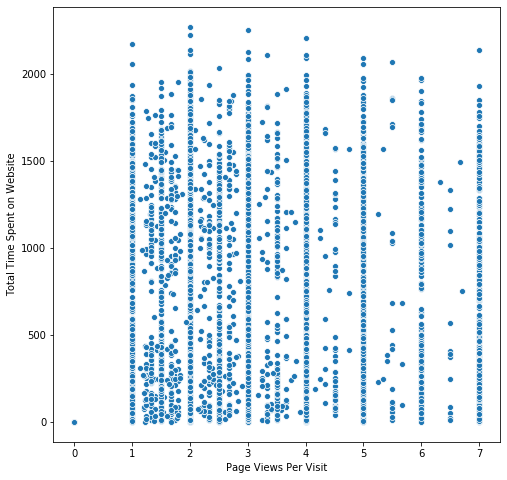

In [53]:
# continuous vs continuous
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            plt.figure(figsize=(8,8))
            print("Scatterplot",i,"Vs",j)
            sns.scatterplot(inp_lead4[i],inp_lead4[j])
            plt.show()

Boxplot Lead Origin Vs TotalVisits


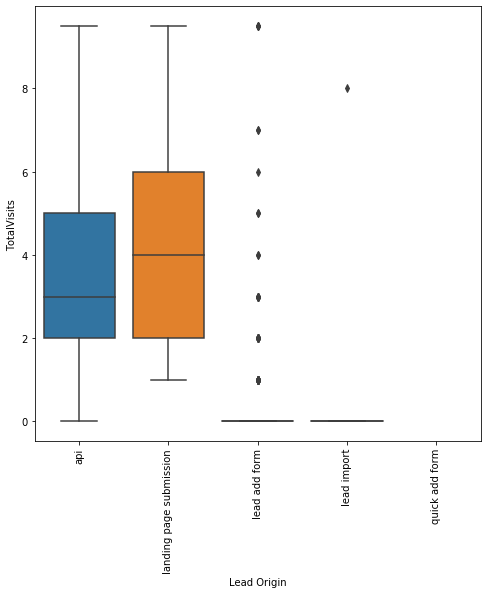

Boxplot Lead Origin Vs Total Time Spent on Website


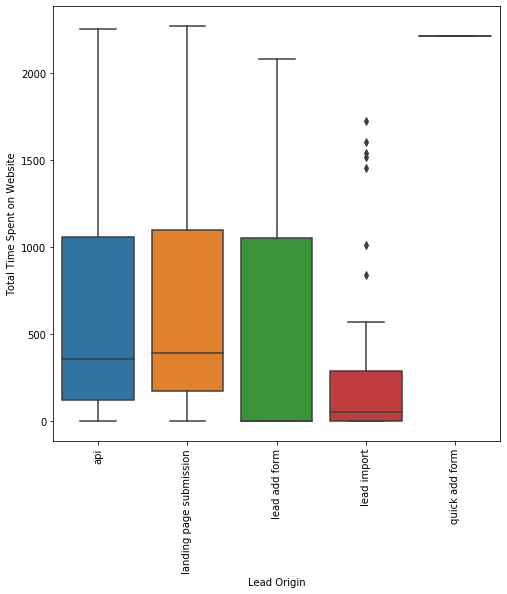

Boxplot Lead Origin Vs Page Views Per Visit


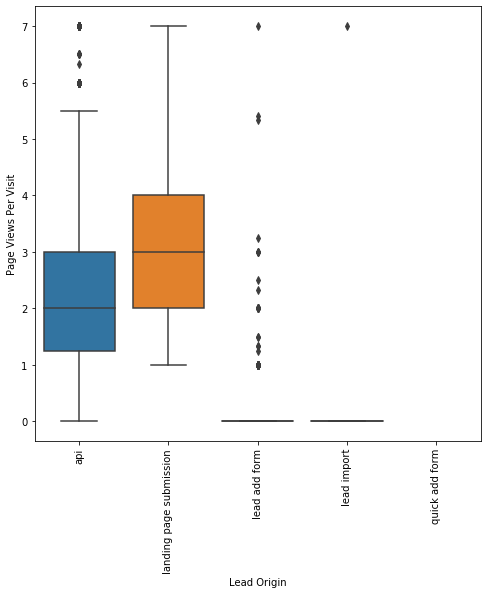

Boxplot Lead Source Vs TotalVisits


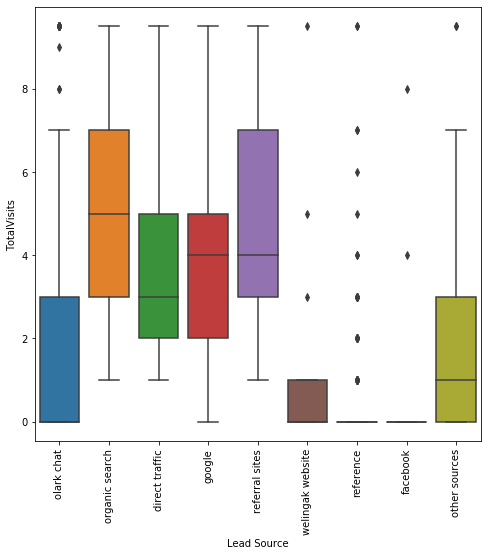

Boxplot Lead Source Vs Total Time Spent on Website


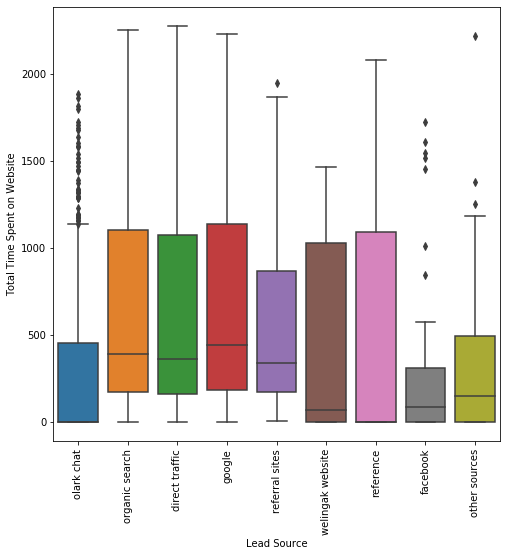

Boxplot Lead Source Vs Page Views Per Visit


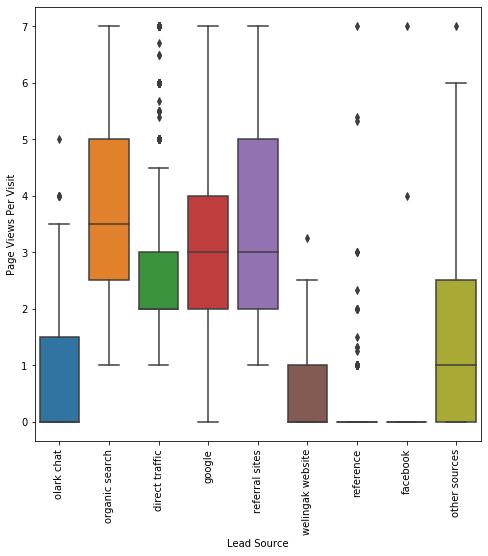

Boxplot Converted Vs TotalVisits


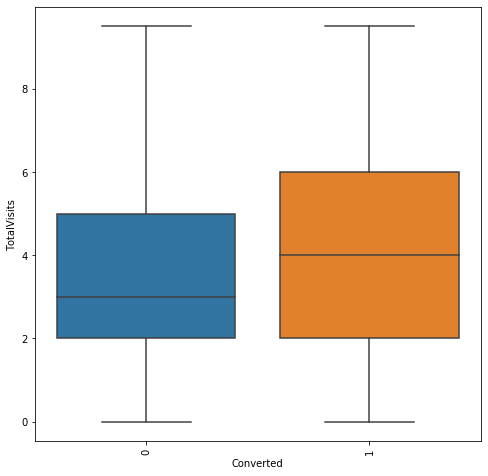

Boxplot Converted Vs Total Time Spent on Website


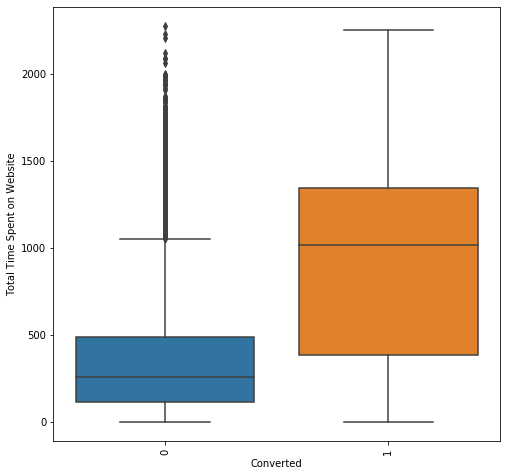

Boxplot Converted Vs Page Views Per Visit


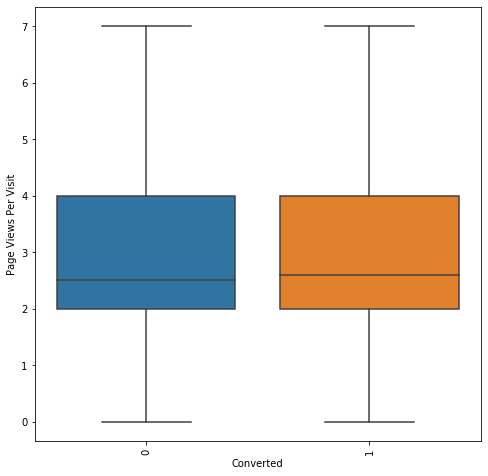

Boxplot Last Activity Vs TotalVisits


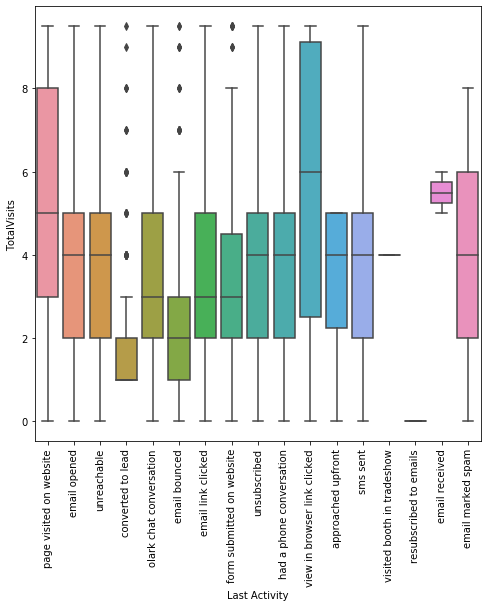

Boxplot Last Activity Vs Total Time Spent on Website


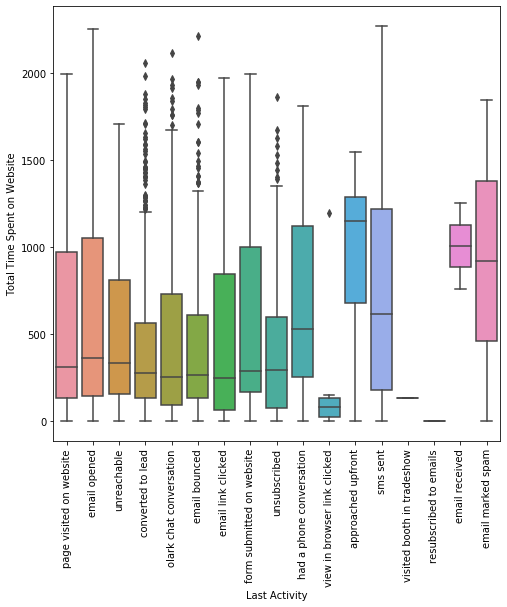

Boxplot Last Activity Vs Page Views Per Visit


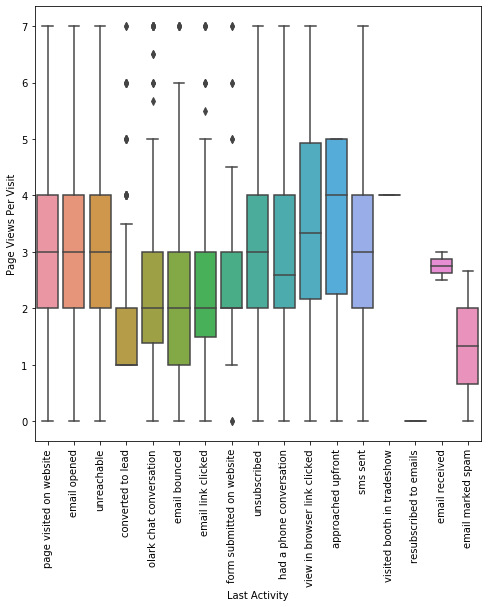

Boxplot Country Vs TotalVisits


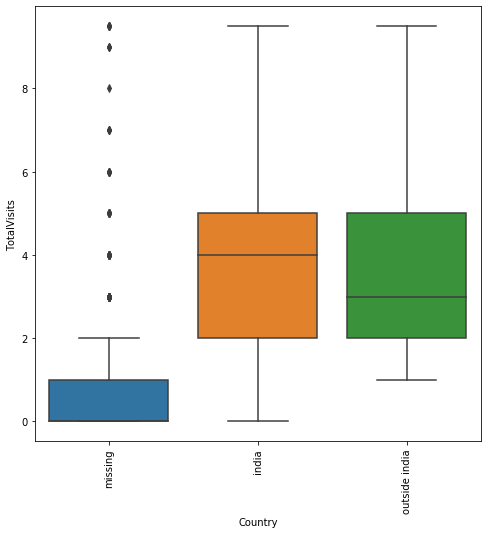

Boxplot Country Vs Total Time Spent on Website


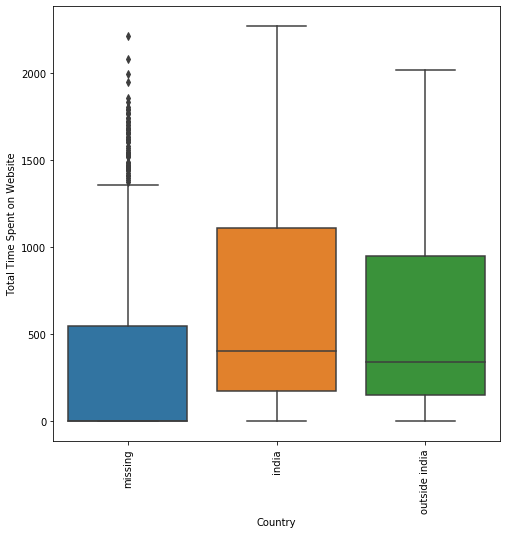

Boxplot Country Vs Page Views Per Visit


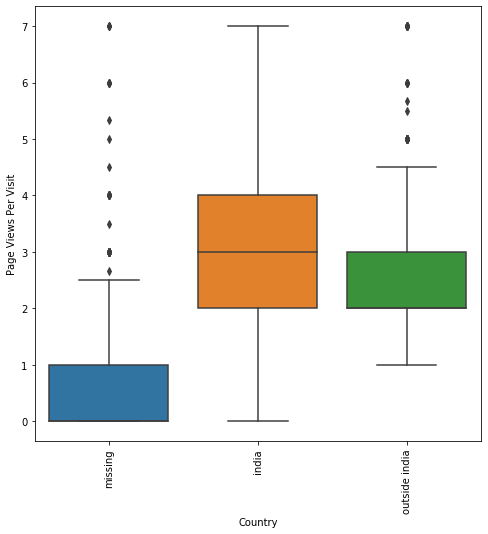

Boxplot Specialization Vs TotalVisits


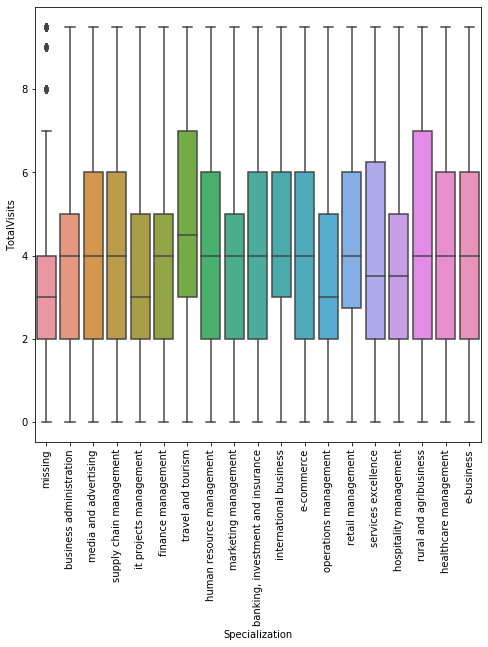

Boxplot Specialization Vs Total Time Spent on Website


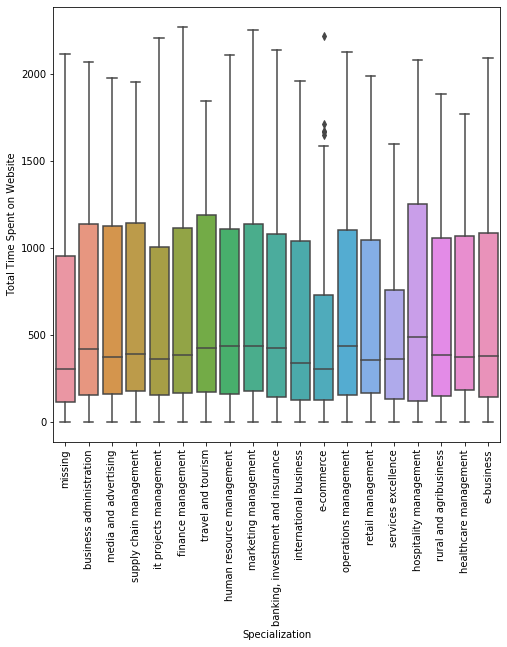

Boxplot Specialization Vs Page Views Per Visit


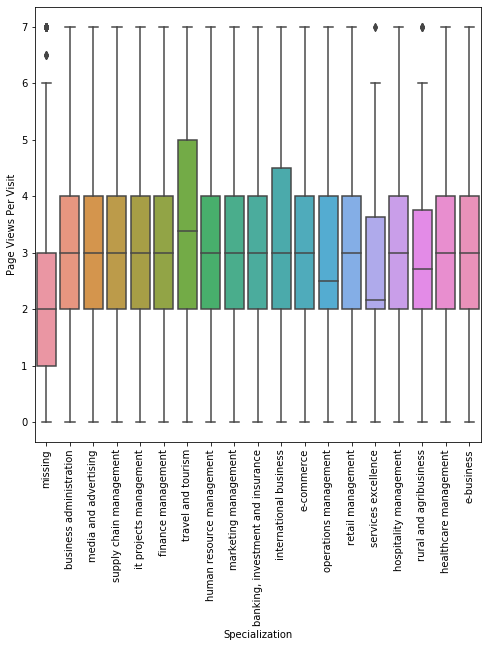

Boxplot What is your current occupation Vs TotalVisits


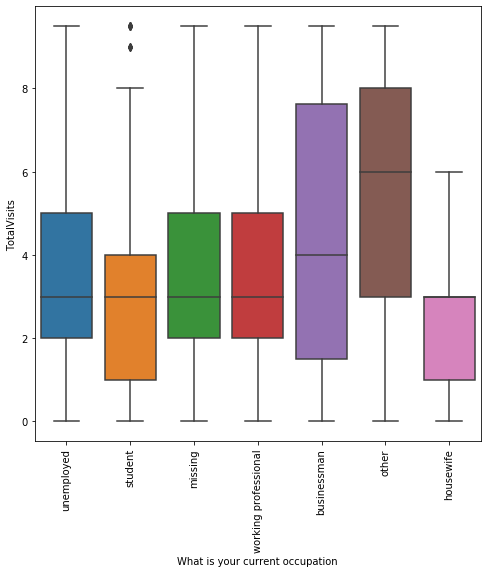

Boxplot What is your current occupation Vs Total Time Spent on Website


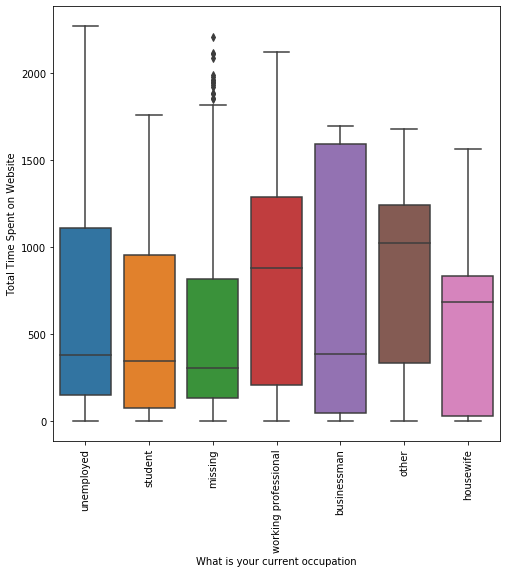

Boxplot What is your current occupation Vs Page Views Per Visit


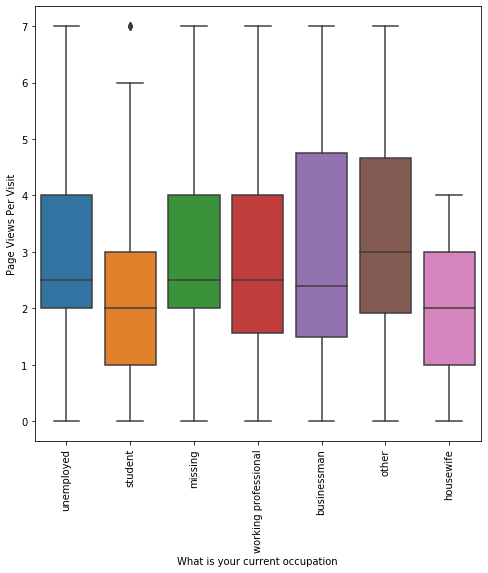

Boxplot What matters most to you in choosing a course Vs TotalVisits


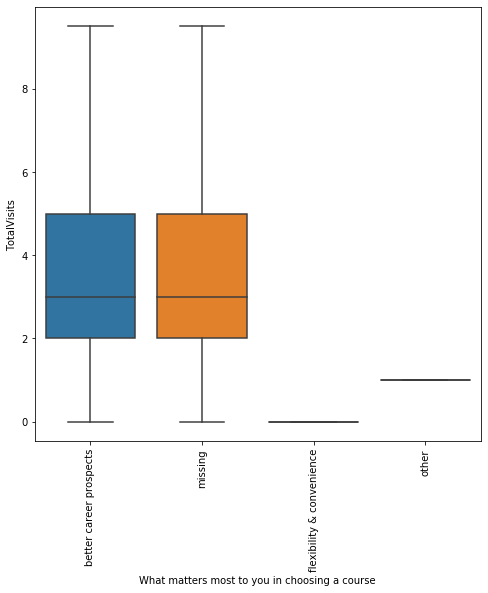

Boxplot What matters most to you in choosing a course Vs Total Time Spent on Website


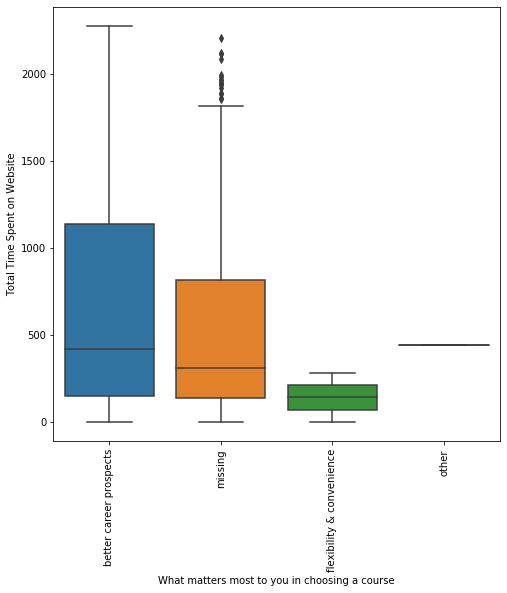

Boxplot What matters most to you in choosing a course Vs Page Views Per Visit


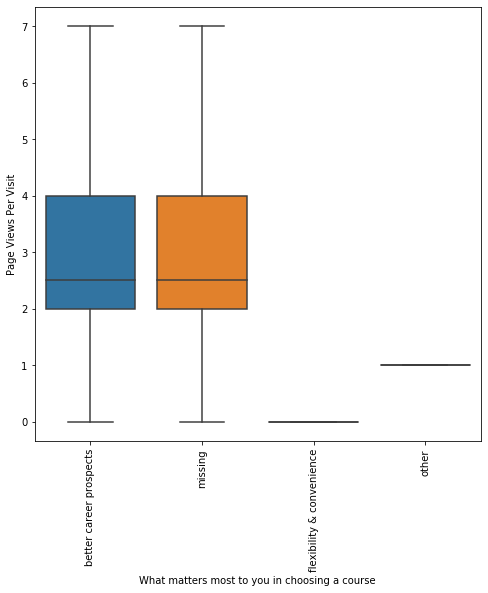

Boxplot A free copy of Mastering The Interview Vs TotalVisits


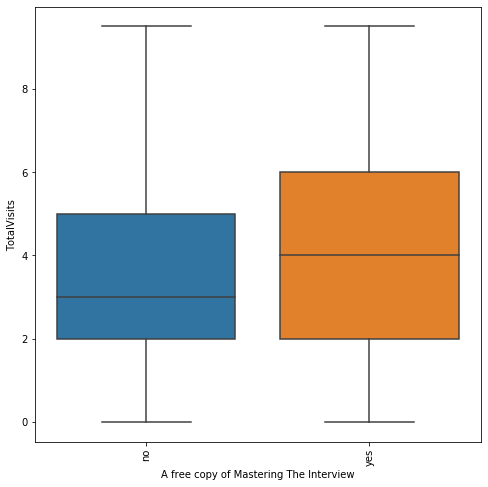

Boxplot A free copy of Mastering The Interview Vs Total Time Spent on Website


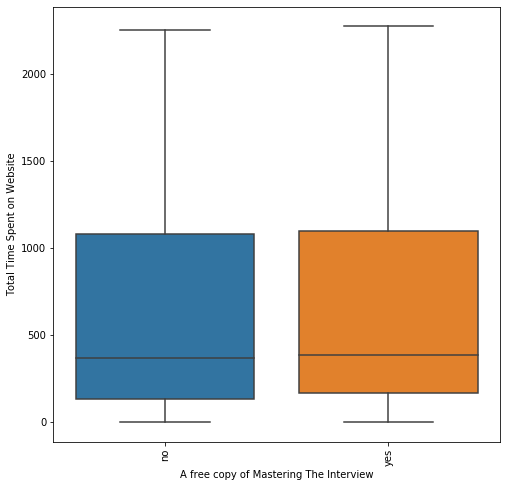

Boxplot A free copy of Mastering The Interview Vs Page Views Per Visit


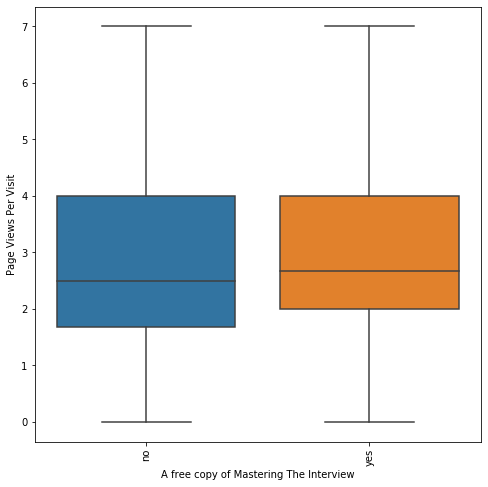

Boxplot Last Notable Activity Vs TotalVisits


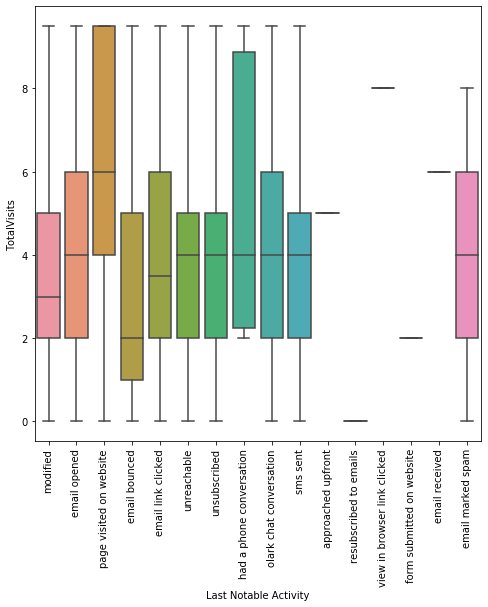

Boxplot Last Notable Activity Vs Total Time Spent on Website


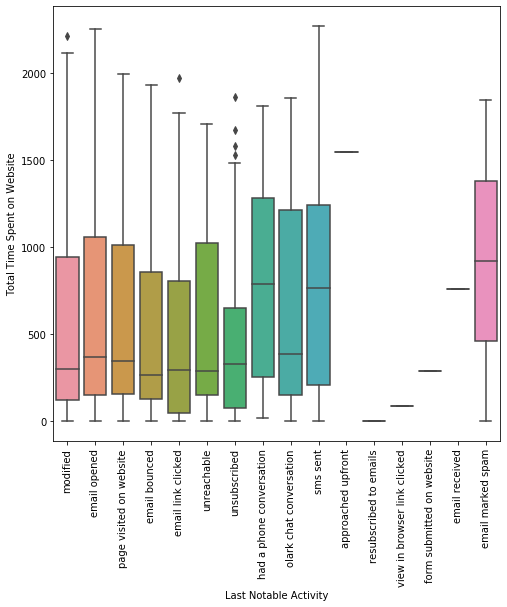

Boxplot Last Notable Activity Vs Page Views Per Visit


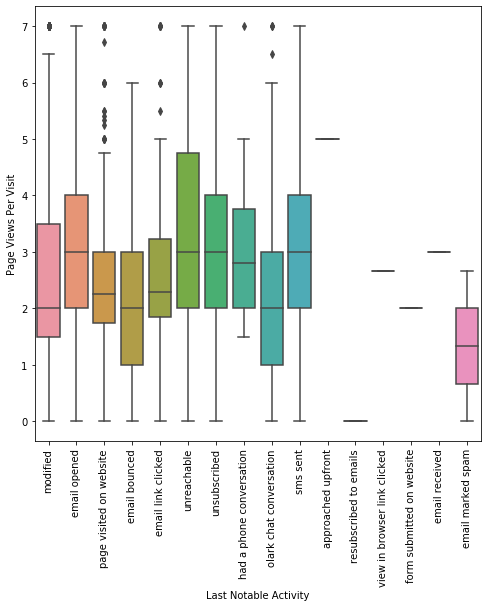

In [54]:
# continuous vs categorical
for i in cat_cols:
    for j in cont_cols:
        plt.figure(figsize=(8,8))
        print("Boxplot",i,"Vs",j)
        sns.boxplot(inp_lead4[i],inp_lead4[j]).tick_params(axis='x', rotation = 90)
        plt.show()

#### 4.6 Multivariate Analysis

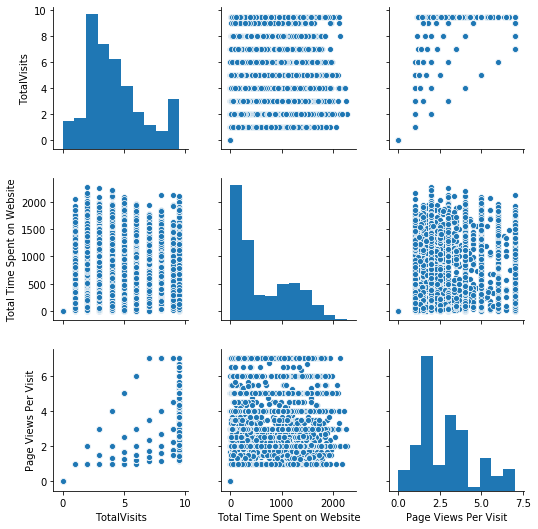

In [55]:
sns.pairplot(inp_lead4[cont_cols])
plt.show()

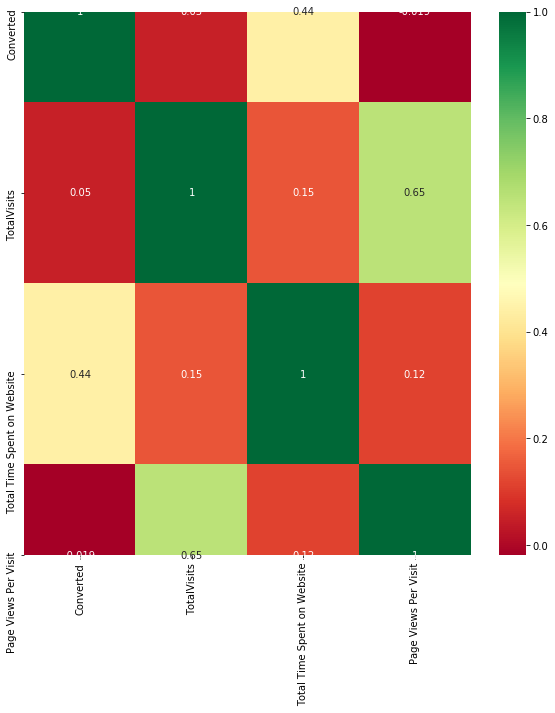

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(inp_lead4.corr(method='pearson'),cmap='RdYlGn',annot=True)
plt.show()

In [57]:
corr = inp_lead4.corr(method='pearson')
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print(sol)

TotalVisits                  Page Views Per Visit           0.652872
Converted                    Total Time Spent on Website    0.439382
TotalVisits                  Total Time Spent on Website    0.146722
Total Time Spent on Website  Page Views Per Visit           0.115181
Converted                    TotalVisits                    0.050459
                             Page Views Per Visit          -0.018783
dtype: float64


#### 5. Additional Preprocessing

###### Dummy Variables

In [58]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(inp_lead4[["Do Not Email",'Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'Country','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity','What matters most to you in choosing a course']], drop_first=True)
# Add the results to the master dataframe
df_final = pd.concat([inp_lead4, dummy], axis=1)
df_final = df_final.drop(["Do Not Email",'Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'Country','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity','What matters most to you in choosing a course'], 1)

In [59]:
# duplicate record count
df_final.duplicated().sum()

0

In [60]:
# drop duplicates
df_final = df_final.drop_duplicates()

In [61]:
# Checking the percent of data lose after data processing
print("Percentage Data Loss after Preprocessing:" , round(100 - 100*(len(df_final)/len(inp_lead)),2))

Percentage Data Loss after Preprocessing: 20.0


In [62]:
# Code for checking number of rows left in percent
print("Percentage Data Retain after Preprocessing:" ,round(100*(len(df_final)/len(inp_lead)),2))

Percentage Data Retain after Preprocessing: 80.0


In [63]:
# Check shape
df_final.shape

(7392, 78)

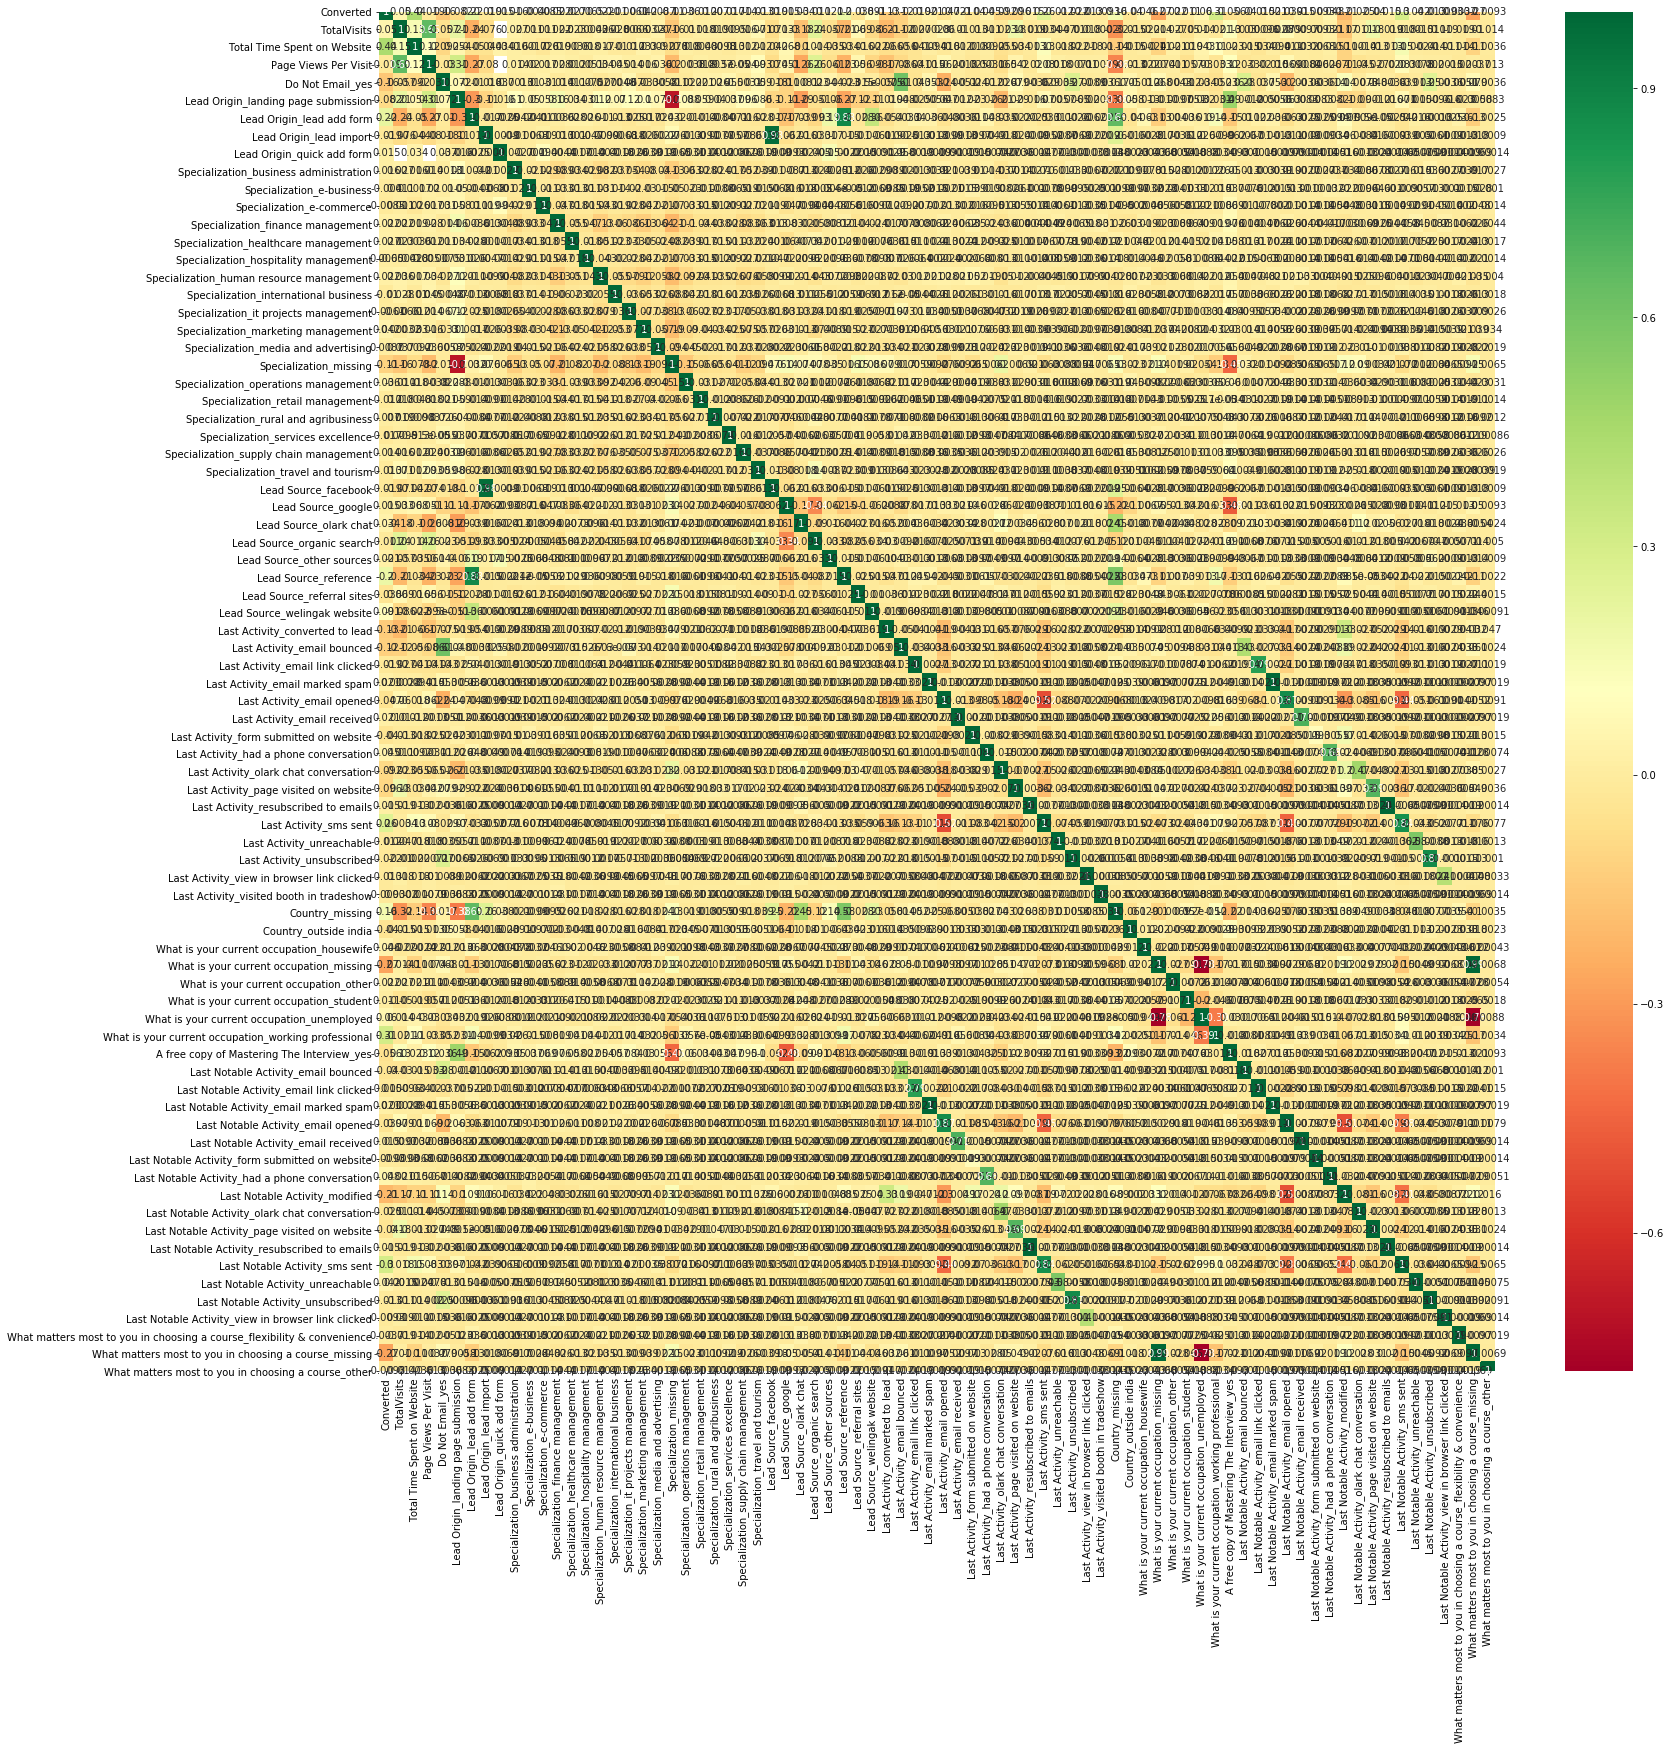

In [64]:
plt.figure(figsize=(25,25))
sns.heatmap(df_final.corr(method='pearson'),cmap='RdYlGn',annot=True)
plt.show()

In [65]:
corr = df_final.corr(method='pearson')
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print("################################### Top 10 corellated variables ###############################")
print(sol[0:9])

################################### Top 10 corellated variables ###############################
Last Activity_email marked spam          Last Notable Activity_email marked spam                  1.000000
Last Activity_resubscribed to emails     Last Notable Activity_resubscribed to emails             1.000000
What is your current occupation_missing  What matters most to you in choosing a course_missing    0.993317
Lead Origin_lead import                  Lead Source_facebook                                     0.977137
Lead Origin_lead add form                Lead Source_reference                                    0.880102
Last Activity_unsubscribed               Last Notable Activity_unsubscribed                       0.872501
Last Activity_email opened               Last Notable Activity_email opened                       0.866889
Last Activity_sms sent                   Last Notable Activity_sms sent                           0.842648
Last Activity_email link clicked         Last No

#### 6. Train-Test Split

In [66]:
# Checking shape before splitting
df_final.shape

(7392, 78)

In [67]:
X=df_final.drop(["Converted"],axis=1)
y=df_final["Converted"]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [69]:
print("X Train Shape",X_train.shape)
print("X Test Shape",X_test.shape)
print("Y Train Shape",y_train.shape)
print("Y Test Shape",y_test.shape)

X Train Shape (5174, 77)
X Test Shape (2218, 77)
Y Train Shape (5174,)
Y Test Shape (2218,)


#### 6.1 Dealing with missing values in Training Set

In [70]:
# Recheck missing value percentage of all columns present in the dataframe
df_missing = pd.DataFrame({'column_name': X_train.columns,
                                 'percent_missing': X_train.isnull().sum() * 100 / len(X_train)}).reset_index(drop=True)
df_missing.sort_values('percent_missing', inplace=True, ascending=False)
print(df_missing[df_missing['percent_missing']!=0])

            column_name  percent_missing
0           TotalVisits         1.894086
2  Page Views Per Visit         1.894086


###### Missing Value Imputation
- Since the "Lead Source" column is categorical variable, we will impute the missing values with the mode()
- Since the "Page Views Per Visit" is a continuous variable, we will impute the missing values with the median()

In [71]:
# Imputing missing values
X_train['TotalVisits'] = X_train['TotalVisits'].fillna(X_train['TotalVisits'].median())
X_train['Page Views Per Visit'] = X_train['Page Views Per Visit'].fillna(X_train['Page Views Per Visit'].median())

In [72]:
# Recheck missing value percentage of all columns present in the dataframe
df_missing = pd.DataFrame({'column_name': X_train.columns,
                                 'percent_missing': X_train.isnull().sum() * 100 / len(X_train)}).reset_index(drop=True)
df_missing.sort_values('percent_missing', inplace=True, ascending=False)
print(df_missing[df_missing['percent_missing']!=0])

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []


#### 6.2 Scaling the continuous numeric variables in Train Set

In [73]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1536     0.000000                     0.000000              0.000000   
5282     0.315789                     0.500226              0.428571   
7861     0.421053                     0.062246              0.571429   
1247     0.947368                     0.096527              0.428571   
3037     0.210526                     0.202977              0.285714   

      Do Not Email_yes  Lead Origin_landing page submission  \
1536                 0                                    0   
5282                 0                                    1   
7861                 0                                    1   
1247                 0                                    0   
3037                 0                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  \
1536                          1                        0   
5282                          0                        0   
7861                          0                        0   
1247                          0                        0   
3037                          0                        0   

      Lead Origin_quick add form  Specialization_business administration  \
1536                           0                                       0   
5282                           0                                       1   
7861                           0                                       0   
1247                           0                                       0   
3037                           0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
1536                          0                          0   
5282                          0                          0   
7861                          0                          0   
1247                          0                          0   
3037                          0                          0   

      Specialization_finance management  Specialization_healthcare management  \
1536                                  0                                     0   
5282                                  0                                     0   
7861                                  1                                     0   
1247                                  0                                     0   
3037                                  1                                     0   

      Specialization_hospitality management  \
1536                                      0   
5282                                      0   
7861                                      0   
1247                                      0   
3037                                      0   

      Specialization_human resource management  \
1536                                         0   
5282                                         0   
7861                                         0   
1247                                         0   
3037                                         0   

      Specialization_international business  \
1536                                      0   
5282                                      0   
7861                                      0   
1247                                      0   
3037                                      0   

      Specialization_it projects management  \
1536                                      0   
5282                                      0   
7861                                      0   
1247                                      0   
3037                                      0   

      Specialization_marketing management  \
1536                                    0   
5282                                    0   
7861                                    0   
1247                                    0   
3037                                    0   

      Specialization_media and advertising  Specialization_missing  \
1536                     

#### 7. Feature Selection

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train,y_train)
cols_to_keep=X_train.columns[selector.support_]

In [75]:
X_train=X_train[cols_to_keep]

In [76]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1536     0.000000                     0.000000              0.000000   
5282     0.315789                     0.500226              0.428571   
7861     0.421053                     0.062246              0.571429   
1247     0.947368                     0.096527              0.428571   
3037     0.210526                     0.202977              0.285714   

      Do Not Email_yes  Lead Origin_lead add form  \
1536                 0                          1   
5282                 0                          0   
7861                 0                          0   
1247                 0                          0   
3037                 0                          0   

      Lead Source_welingak website  Last Activity_sms sent  \
1536                             0                       1   
5282                             0                       1   
7861                             0                       1   
1247                             0                       0   
3037                             0                       1   

      Last Activity_unsubscribed  Country_missing  \
1536                           0                1   
5282                           0                0   
7861                           0                0   
1247                           0                0   
3037                           0                0   

      What is your current occupation_housewife  \
1536                                          0   
5282                                          0   
7861                                          0   
1247                                          0   
3037                                          0   

      What is your current occupation_working professional  \
1536                                                  0      
5282                                                  0      
7861                                                  0      
1247                                                  0      
3037                                                  0      

      Last Notable Activity_had a phone conversation  \
1536                                               0   
5282                                               0   
7861                                               0   
1247                                               0   
3037                                               0   

      Last Notable Activity_unreachable  \
1536                                  0   
5282                                  0   
7861                                  0   
1247                                  0   
3037                                  0   

      What matters most to you in choosing a course_flexibility & convenience  \
1536                                                  0                         
5282                                                  0                         
7861                                                  0                         
1247                                                  0                         
3037                                                  0                         

      What matters most to you in choosing a course_missing  
1536                                                  0      
5282                                                  0      
7861                                                  0      
1247                                                  0      
3037                                                  0

#### 8. Create Logistic Model

In [77]:
#import stats model
import statsmodels.api as sm

In [78]:
# add constant
X_train_sm=sm.add_constant(X_train,has_constant="add")

In [79]:
# Fit GLM model
model1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5174
Model:                            GLM   Df Residuals:                     5158
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2286.8
Date:                Tue, 15 Nov 2022   Deviance:                       4573.6
Time:                        16:35:32   Pearson chi2:                 5.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.2996      0.108    -21.302      0.000      -2.511      -2.088
TotalVisits                                                                 1.5082      0.186      8.112      0.000       1.144       1.873
Total Time Spent on Website                                                 4.3332      0.160     27.099      0.000       4.020       4.647
Page Views Per Visit                                                       -1.1595      0.210     -5.526      0.000      -1.571      -0.748
Do Not Email_yes                                                           -1.4564      0.176     -8.278      0.000      -1.801      -1.112
Lead Origin_lead add form                                                   1.8427      0.280      6.577      0.000       1.294       2.392
Lead Source_welingak website                                                1.2135      0.797      1.522      0.128      -0.349       2.776
Last Activity_sms sent                                                      1.2165      0.079     15.351      0.000       1.061       1.372
Last Activity_unsubscribed                                                  1.3260      0.443      2.993      0.003       0.458       2.194
Country_missing                                                             1.3109      0.178      7.385      0.000       0.963       1.659
What is your current occupation_housewife                                  22.9721   1.43e+04      0.002      0.999    -2.8e+04     2.8e+04
What is your current occupation_working professional                        2.4332      0.192     12.648      0.000       2.056       2.810
Last Notable Activity_had a phone conversation                              3.4782      1.151      3.023      0.003       1.223       5.734
Last Notable Activity_unreachable                                           2.3292      0.610      3.819      0.000       1.134       3.525
What matters most to you in choosing a course_flexibility & convenience   -26.4588   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What matters most to you in choosing a course_missing                      -1.1436      0.095    -12.101      0.000      -1.329      -0.958
===========================================================================================================================================
"""

In [80]:
# Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                                               const  7.659615
1                                         TotalVisits  1.786018
2                         Total Time Spent on Website  1.077218
3                                Page Views Per Visit  1.808326
4                                    Do Not Email_yes  1.099425
5                           Lead Origin_lead add form  1.989692
6                        Lead Source_welingak website  1.152333
7                              Last Activity_sms sent  1.046117
8                          Last Activity_unsubscribed  1.083963
9                                     Country_missing  1.942622
10          What is your current occupation_housewife  1.010323
11  What is your current occupation_working profes...  1.073510
12     Last Notable Activity_had a phone conversation  1.001365
13                  Last Notable Activity_unreachable  1.003610
14  What matters most to you in choosing a course_...  1.006598
15  What matters most to you in choosing a course_...  1.060337

In [81]:
# Drop high p-value column
X_train_sm.drop(['What matters most to you in choosing a course_flexibility & convenience'],axis=1,inplace=True)

In [82]:
# Create model 2
model2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5174
Model:                            GLM   Df Residuals:                     5159
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2290.6
Date:                Tue, 15 Nov 2022   Deviance:                       4581.3
Time:                        16:35:32   Pearson chi2:                 5.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2938      0.108    -21.276      0.000      -2.505      -2.082
TotalVisits                                               1.5055      0.186      8.102      0.000       1.141       1.870
Total Time Spent on Website                               4.3309      0.160     27.106      0.000       4.018       4.644
Page Views Per Visit                                     -1.1656      0.210     -5.557      0.000      -1.577      -0.754
Do Not Email_yes                                         -1.4524      0.176     -8.271      0.000      -1.797      -1.108
Lead Origin_lead add form                                 1.7899      0.277      6.456      0.000       1.246       2.333
Lead Source_welingak website                              1.2636      0.796      1.587      0.112      -0.297       2.824
Last Activity_sms sent                                    1.2171      0.079     15.370      0.000       1.062       1.372
Last Activity_unsubscribed                                1.3241      0.442      2.993      0.003       0.457       2.191
Country_missing                                           1.3070      0.177      7.371      0.000       0.959       1.654
What is your current occupation_housewife                22.9809   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
What is your current occupation_working professional      2.3998      0.190     12.609      0.000       2.027       2.773
Last Notable Activity_had a phone conversation            3.4773      1.151      3.022      0.003       1.222       5.733
Last Notable Activity_unreachable                         2.3313      0.610      3.825      0.000       1.137       3.526
What matters most to you in choosing a course_missing    -1.1450      0.094    -12.118      0.000      -1.330      -0.960
=========================================================================================================================
"""

In [83]:
#check VIF in Model 2
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                                               const  7.658932
1                                         TotalVisits  1.786011
2                         Total Time Spent on Website  1.077132
3                                Page Views Per Visit  1.808128
4                                    Do Not Email_yes  1.099420
5                           Lead Origin_lead add form  1.985514
6                        Lead Source_welingak website  1.151792
7                              Last Activity_sms sent  1.046031
8                          Last Activity_unsubscribed  1.083961
9                                     Country_missing  1.942557
10          What is your current occupation_housewife  1.010293
11  What is your current occupation_working profes...  1.071896
12     Last Notable Activity_had a phone conversation  1.001365
13                  Last Notable Activity_unreachable  1.003598
14  What matters most to you in choosing a course_...  1.060316

In [84]:
# Drop high p-value column
X_train_sm.drop(["What is your current occupation_housewife"],axis=1,inplace=True)

In [85]:
# Create model 3
model3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5174
Model:                            GLM   Df Residuals:                     5160
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2298.3
Date:                Tue, 15 Nov 2022   Deviance:                       4596.7
Time:                        16:35:33   Pearson chi2:                 5.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2738      0.107    -21.175      0.000      -2.484      -2.063
TotalVisits                                               1.4896      0.186      8.028      0.000       1.126       1.853
Total Time Spent on Website                               4.3230      0.160     27.101      0.000       4.010       4.636
Page Views Per Visit                                     -1.1653      0.210     -5.561      0.000      -1.576      -0.755
Do Not Email_yes                                         -1.4583      0.176     -8.303      0.000      -1.803      -1.114
Lead Origin_lead add form                                 1.8664      0.276      6.774      0.000       1.326       2.406
Lead Source_welingak website                              1.1932      0.796      1.499      0.134      -0.367       2.753
Last Activity_sms sent                                    1.2082      0.079     15.277      0.000       1.053       1.363
Last Activity_unsubscribed                                1.3190      0.443      2.980      0.003       0.451       2.187
Country_missing                                           1.2828      0.177      7.259      0.000       0.936       1.629
What is your current occupation_working professional      2.3906      0.190     12.561      0.000       2.018       2.764
Last Notable Activity_had a phone conversation            3.4669      1.151      3.013      0.003       1.212       5.722
Last Notable Activity_unreachable                         2.3250      0.610      3.812      0.000       1.130       3.521
What matters most to you in choosing a course_missing    -1.1500      0.094    -12.183      0.000      -1.335      -0.965
=========================================================================================================================
"""

In [86]:
#check VIF in Model 3
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                                               const  7.647507
1                                         TotalVisits  1.785525
2                         Total Time Spent on Website  1.077126
3                                Page Views Per Visit  1.808125
4                                    Do Not Email_yes  1.099284
5                           Lead Origin_lead add form  1.972860
6                        Lead Source_welingak website  1.150275
7                              Last Activity_sms sent  1.045467
8                          Last Activity_unsubscribed  1.083953
9                                     Country_missing  1.941429
10  What is your current occupation_working profes...  1.071067
11     Last Notable Activity_had a phone conversation  1.001359
12                  Last Notable Activity_unreachable  1.003577
13  What matters most to you in choosing a course_...  1.059873

In [87]:
#Drop High p-value column
X_train_sm.drop(["Lead Source_welingak website"],axis=1,inplace=True)

In [88]:
# Create model 4
model4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5174
Model:                            GLM   Df Residuals:                     5161
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2299.8
Date:                Tue, 15 Nov 2022   Deviance:                       4599.5
Time:                        16:35:33   Pearson chi2:                 5.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2728      0.107    -21.170      0.000      -2.483      -2.062
TotalVisits                                               1.4894      0.186      8.028      0.000       1.126       1.853
Total Time Spent on Website                               4.3238      0.160     27.103      0.000       4.011       4.636
Page Views Per Visit                                     -1.1683      0.210     -5.575      0.000      -1.579      -0.758
Do Not Email_yes                                         -1.4485      0.175     -8.282      0.000      -1.791      -1.106
Lead Origin_lead add form                                 2.0188      0.264      7.651      0.000       1.502       2.536
Last Activity_sms sent                                    1.2095      0.079     15.301      0.000       1.055       1.364
Last Activity_unsubscribed                                1.3052      0.443      2.945      0.003       0.437       2.174
Country_missing                                           1.2747      0.176      7.235      0.000       0.929       1.620
What is your current occupation_working professional      2.3845      0.190     12.521      0.000       2.011       2.758
Last Notable Activity_had a phone conversation            3.4676      1.151      3.014      0.003       1.212       5.723
Last Notable Activity_unreachable                         2.3246      0.610      3.809      0.000       1.128       3.521
What matters most to you in choosing a course_missing    -1.1504      0.094    -12.187      0.000      -1.335      -0.965
=========================================================================================================================
"""

In [89]:
# Check VIF in Model 4
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                                               const  7.646163
1                                         TotalVisits  1.785483
2                         Total Time Spent on Website  1.077120
3                                Page Views Per Visit  1.807921
4                                    Do Not Email_yes  1.099202
5                           Lead Origin_lead add form  1.799841
6                              Last Activity_sms sent  1.045222
7                          Last Activity_unsubscribed  1.083858
8                                     Country_missing  1.939562
9   What is your current occupation_working profes...  1.063594
10     Last Notable Activity_had a phone conversation  1.001358
11                  Last Notable Activity_unreachable  1.003508
12  What matters most to you in choosing a course_...  1.059719

#### 9. Prediction using final model i.e result4 on TRAIN SET with Cut-off 50%

In [90]:
train_pred=result4.predict(X_train_sm)
train=pd.DataFrame(train_pred,columns=["Predicted_probs"])
train["Actual"]=y_train
# Cut off 50 %
train["Predicted"]=np.where(train["Predicted_probs"]>0.5,1,0)#by default 0.5
train.head()

Predicted_probs  Actual  Predicted
1536         0.902935       1          1
5282         0.744448       0          1
7861         0.302666       0          0
1247         0.279856       1          0
3037         0.448706       0          0

#### 10. Model Evaluation

In [91]:
from sklearn import metrics

In [92]:
# from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix

In [93]:
# Confusion Matrix
confusion_matrix=metrics.confusion_matrix(train["Actual"],train["Predicted"])
confusion_matrix

array([[2733,  423],
       [ 649, 1369]], dtype=int64)

##### Accuracy+sensitivity+specificity+Precision+Recall with cut-off 50%

In [94]:
# Check the overall accuracy
metrics.accuracy_score(train["Actual"],train["Predicted"])

0.7928102048705064

In [95]:
# Substituting the value of true positive
TP = confusion_matrix[1,1]
# Substituting the value of true negatives
TN = confusion_matrix[0,0]
# Substituting the value of false positives
FP = confusion_matrix[0,1] 
# Substituting the value of false negatives
FN = confusion_matrix[1,0]

In [96]:
# Calculating the sensitivity
TP/(TP+FN)

0.678394449950446

In [97]:
# Calculating the specificity
TN/(TN+FP)

0.8659695817490495

In [98]:
#Precision = TP / TP + FP
TP/(TP+FP)

0.7639508928571429

In [99]:
#Recall = TP / TP + FN
TP/(TP+FN)

0.678394449950446

##### With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 67% and specificity of around 87%.

##### 11. Optimise Cut off (ROC Curve)

In [100]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Lead Scoring ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [101]:
# fpr, tpr, thresholds = metrics.roc_curve( train.Actual, train.Predicted_probs, drop_intermediate = False )

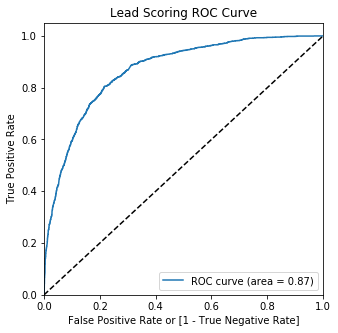

In [102]:
# Call the ROC function
draw_roc(train.Actual, train.Predicted_probs)

In [103]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train[i]=  train.Predicted_probs.map(lambda x: 1 if x > i else 0)
train.head()

Predicted_probs  Actual  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
1536         0.902935       1          1    1    1    1    1    1    1    1   
5282         0.744448       0          1    1    1    1    1    1    1    1   
7861         0.302666       0          0    1    1    1    1    0    0    0   
1247         0.279856       1          0    1    1    1    0    0    0    0   
3037         0.448706       0          0    1    1    1    1    1    0    0   

      0.7  0.8  0.9  
1536    1    1    1  
5282    1    0    0  
7861    0    0    0  
1247    0    0    0  
3037    0    0    0

In [104]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train.Actual, train[i] )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.390027  1.000000  0.000000
0.1   0.1  0.570158  0.981665  0.307034
0.2   0.2  0.730383  0.917740  0.610583
0.3   0.3  0.774256  0.841923  0.730989
0.4   0.4  0.792230  0.759663  0.813054
0.5   0.5  0.792810  0.678394  0.865970
0.6   0.6  0.779088  0.582755  0.904626
0.7   0.7  0.759374  0.483647  0.935678
0.8   0.8  0.725551  0.348365  0.966730
0.9   0.9  0.680905  0.199207  0.988910

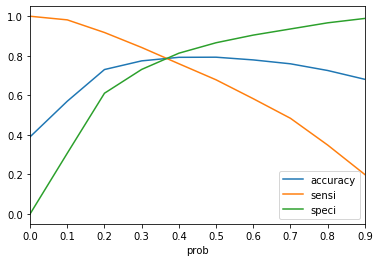

In [105]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [106]:
# Setting Cut-off 35%
train['final_predicted'] = train.Predicted_probs.map( lambda x: 1 if x > 0.35 else 0)
train.head()

Predicted_probs  Actual  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
1536         0.902935       1          1    1    1    1    1    1    1    1   
5282         0.744448       0          1    1    1    1    1    1    1    1   
7861         0.302666       0          0    1    1    1    1    0    0    0   
1247         0.279856       1          0    1    1    1    0    0    0    0   
3037         0.448706       0          0    1    1    1    1    1    0    0   

      0.7  0.8  0.9  final_predicted  
1536    1    1    1                1  
5282    1    0    0                1  
7861    0    0    0                0  
1247    0    0    0                0  
3037    0    0    0                1

##### Accuracy+sensitivity+specificity+Precision+Recall with 35% on TRAIN SET

In [107]:
# Check the overall accuracy
metrics.accuracy_score(train["Actual"],train["Predicted"])

0.7928102048705064

In [108]:
# Creating confusion matrix 
cm3 = metrics.confusion_matrix(train["Actual"], train['final_predicted'])
cm3

array([[2449,  707],
       [ 390, 1628]], dtype=int64)

In [109]:
# Substituting the value of true positive
TP = cm3[1,1]
# Substituting the value of true negatives
TN = cm3[0,0]
# Substituting the value of false positives
FP = cm3[0,1] 
# Substituting the value of false negatives
FN = cm3[1,0]

In [110]:
# Calculating the sensitivity
TP/(TP+FN)

0.8067393458870169

In [111]:
# Calculating the specificity
TN/(TN+FP)

0.7759822560202788

In [112]:
#Precision = TP / TP + FP
TP/(TP+FP)

0.6972162740899358

In [113]:
#Recall = TP / TP + FN
TP/(TP+FN)

0.8067393458870169

#### 12. Prediction on TEST SET

#### 12.1 Dealing with missing Values in Test Set

In [114]:
# Recheck missing value percentage of all columns present in the dataframe
df_missing = pd.DataFrame({'column_name': X_test.columns,
                                 'percent_missing': X_test.isnull().sum() * 100 / len(X_test)}).reset_index(drop=True)
df_missing.sort_values('percent_missing', inplace=True, ascending=False)
print(df_missing[df_missing['percent_missing']!=0])

            column_name  percent_missing
0           TotalVisits         1.713255
2  Page Views Per Visit         1.713255


##### Imputing missing values
- Since the "Lead Source" column is categorical variable, we will impute the missing values with the mode()
- Since the "Page Views Per Visit" is a continuous variable, we will impute the missing values with the median()

In [115]:
# Imputing missing values
X_test['TotalVisits'] = X_test['TotalVisits'].fillna(X_test['TotalVisits'].median())
X_test['Page Views Per Visit'] = X_test['Page Views Per Visit'].fillna(X_test['Page Views Per Visit'].median())

##### 12.2 Scale continuous variables in test set

In [116]:
# Scale continuous variables
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3599     0.315789                     0.036085              0.214286   
5002     0.421053                     0.168245              0.285714   
6345     0.210526                     0.457826              0.285714   
3434     0.315789                     0.033378              0.428571   
4967     0.210526                     0.099684              0.285714   

      Do Not Email_yes  Lead Origin_landing page submission  \
3599                 0                                    0   
5002                 0                                    1   
6345                 0                                    1   
3434                 0                                    1   
4967                 0                                    0   

      Lead Origin_lead add form  Lead Origin_lead import  \
3599                          0                        0   
5002                          0                        0   
6345                          0                        0   
3434                          0                        0   
4967                          0                        0   

      Lead Origin_quick add form  Specialization_business administration  \
3599                           0                                       0   
5002                           0                                       0   
6345                           0                                       0   
3434                           0                                       0   
4967                           0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
3599                          0                          0   
5002                          0                          0   
6345                          0                          0   
3434                          0                          0   
4967                          0                          0   

      Specialization_finance management  Specialization_healthcare management  \
3599                                  0                                     0   
5002                                  1                                     0   
6345                                  0                                     0   
3434                                  1                                     0   
4967                                  0                                     0   

      Specialization_hospitality management  \
3599                                      0   
5002                                      0   
6345                                      0   
3434                                      0   
4967                                      0   

      Specialization_human resource management  \
3599                                         0   
5002                                         0   
6345                                         0   
3434                                         0   
4967                                         1   

      Specialization_international business  \
3599                                      0   
5002                                      0   
6345                                      0   
3434                                      0   
4967                                      0   

      Specialization_it projects management  \
3599                                      0   
5002                                      0   
6345                                      0   
3434                                      0   
4967                                      0   

      Specialization_marketing management  \
3599                                    0   
5002                                    0   
6345                                    0   
3434                                    0   
4967                                    0   

      Specialization_media and advertising  Specialization_missing  \
3599                     

In [117]:
# Create columns list that present in final train model
cols = list(X_train_sm.columns)
del cols[0]

In [118]:
# Substituting all the columns in the final train model
X_test=X_test[cols]
#add contant
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [119]:
X_test_sm.head()

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3599    1.0     0.315789                     0.036085              0.214286   
5002    1.0     0.421053                     0.168245              0.285714   
6345    1.0     0.210526                     0.457826              0.285714   
3434    1.0     0.315789                     0.033378              0.428571   
4967    1.0     0.210526                     0.099684              0.285714   

      Do Not Email_yes  Lead Origin_lead add form  Last Activity_sms sent  \
3599                 0                          0                       0   
5002                 0                          0                       1   
6345                 0                          0                       1   
3434                 0                          0                       0   
4967                 0                          0                       0   

      Last Activity_unsubscribed  Country_missing  \
3599                           0                0   
5002                           0                0   
6345                           0                0   
3434                           0                0   
4967                           0                0   

      What is your current occupation_working professional  \
3599                                                  0      
5002                                                  0      
6345                                                  0      
3434                                                  0      
4967                                                  1      

      Last Notable Activity_had a phone conversation  \
3599                                               0   
5002                                               0   
6345                                               0   
3434                                               0   
4967                                               0   

      Last Notable Activity_unreachable  \
3599                                  0   
5002                                  0   
6345                                  0   
3434                                  0   
4967                                  0   

      What matters most to you in choosing a course_missing  
3599                                                  0      
5002                                                  0      
6345                                                  0      
3434                                                  0      
4967                                                  0

###### 13 Make Prediction on Test Set with 35% cut-off

In [120]:
# Storing prediction of test set in the variable 'y_test_pred'
test_pred = result4.predict(X_test_sm)

In [121]:
# Create Dtaframe with Actual & Pred_prob
test=pd.DataFrame(test_pred,columns=["Predicted_probs"])
test["Actual"]=y_test

In [122]:
# Making prediction using cut off 0.35
test['final_predicted'] = test.Predicted_probs.map(lambda x: 1 if x > 0.35 else 0)
test

Predicted_probs  Actual  final_predicted
3599         0.130469       0                0
5002         0.489371       0                1
6345         0.710130       0                1
3434         0.103506       0                0
4967         0.627728       0                1
...               ...     ...              ...
1750         0.715416       0                1
4167         0.721409       0                1
6511         0.454048       0                1
4840         0.308876       0                0
4497         0.548955       1                1

[2218 rows x 3 columns]

###### Accuracy+sensitivity+specificity+Precision+Recall with 35% on TEST SET

In [123]:
# Check the overall accuracy
metrics.accuracy_score(test['Actual'], test.final_predicted)

0.8101893597835889

In [124]:
# Creating confusion matrix 
cm4 = metrics.confusion_matrix(test['Actual'], test.final_predicted )
cm4

array([[1079,  270],
       [ 151,  718]], dtype=int64)

In [125]:
# Substituting the value of true positive
TP = cm4[1,1]
# Substituting the value of true negatives
TN = cm4[0,0]
# Substituting the value of false positives
FP = cm4[0,1] 
# Substituting the value of false negatives
FN = cm4[1,0]

In [126]:
# Calculating the sensitivity
TP/(TP+FN)

0.8262370540851554

In [127]:
# Calculating the specificity
TN/(TN+FP)

0.7998517420311342

In [128]:
#Precision = TP / TP + FP
TP/(TP+FP)

0.7267206477732794

In [129]:
#Recall = TP / TP + FN
TP/(TP+FN)

0.8262370540851554

#### 14. Precision and recall tradeoff

In [130]:
from sklearn.metrics import precision_recall_curve

In [131]:
p, r, thresholds = precision_recall_curve(train.Actual, train.Predicted_probs)

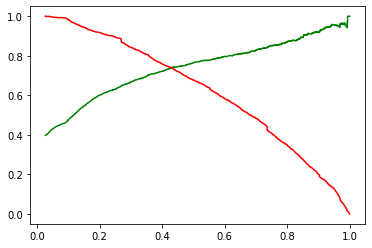

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Accuracy+sensitivity+specificity+Precision+Recall with 41% on TRAIN SET

In [133]:
# New Cut-off 41%
train['final_predicted'] = train.Predicted_probs.map(lambda x: 1 if x > 0.41 else 0)
train.head()

Predicted_probs  Actual  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
1536         0.902935       1          1    1    1    1    1    1    1    1   
5282         0.744448       0          1    1    1    1    1    1    1    1   
7861         0.302666       0          0    1    1    1    1    0    0    0   
1247         0.279856       1          0    1    1    1    0    0    0    0   
3037         0.448706       0          0    1    1    1    1    1    0    0   

      0.7  0.8  0.9  final_predicted  
1536    1    1    1                1  
5282    1    0    0                1  
7861    0    0    0                0  
1247    0    0    0                0  
3037    0    0    0                1

In [134]:
# Accuracy
metrics.accuracy_score(train.Actual, train.final_predicted)

0.7937765751836103

In [135]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(train.Actual, train.final_predicted )
confusion2

array([[2590,  566],
       [ 501, 1517]], dtype=int64)

In [136]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [137]:
# Calculating the sensitivity
TP/(TP+FN)

0.7517343904856293

In [138]:
# Calculating the specificity
TN/(TN+FP)

0.820659062103929

In [139]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.728276524243879

In [140]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7517343904856293

##### Accuracy+sensitivity+specificity+Precision+Recall with 41% on TEST SET

In [141]:
# New Cut-off 41%
test['final_predicted'] = test.Predicted_probs.map(lambda x: 1 if x > 0.41 else 0)
test.head()

Predicted_probs  Actual  final_predicted
3599         0.130469       0                0
5002         0.489371       0                1
6345         0.710130       0                1
3434         0.103506       0                0
4967         0.627728       0                1

In [142]:
# Accuracy
metrics.accuracy_score(test.Actual, test.final_predicted)

0.821009918845807

In [143]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(test.Actual, test.final_predicted )
confusion2

array([[1134,  215],
       [ 182,  687]], dtype=int64)

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Calculating the sensitivity
TP/(TP+FN)

0.7905638665132336

In [146]:
# Calculating the specificity
TN/(TN+FP)

0.8406226834692365

In [147]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.761640798226164

In [148]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7905638665132336

#### Conclusion

It was found that the variables that mattered the most in finding the potential leads are:

1.	The total time spend on the Website.
2.	Page Views Per Visit.
3.  TotalVisits
4.	When the Last Notable Activity is had a phone conversation
4.	When the last activity is SMS sent
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.

Note: X Education can meet the goals as they have a very high chance to get almost all the potential leads.